# CS105 Final Project: Using NLP to Analyze Syntax 

by Daria Senchylova, Denise Chan,  Neda Mohammadi, Tann Nguyen, Trisha Agrawal 

In [1]:
# Necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Processing

In [2]:
# Importing data
novel_df = pd.read_csv("rough_data.csv")
# novel_df.head()

In [3]:
# Cleaning data for algorithm to read easily 

# Change to lowercase
novel_df["Excerpt"] = novel_df["Excerpt"].str.lower()

# Delete newlines
novel_df["Excerpt"] = novel_df["Excerpt"].replace(r'\n','', regex=True)

# Delete accidental copy-paste errors
novel_df["Excerpt"] = novel_df["Excerpt"]\
.replace('free ebooks at planet ebook.com','', regex=True)
novel_df["Excerpt"] = novel_df["Excerpt"]\
.replace('ebook.com','', regex=True)
novel_df["Excerpt"] = novel_df["Excerpt"]\
.replace('ebooks','', regex=True)
novel_df["Excerpt"] = novel_df["Excerpt"]\
.replace('ebook','', regex=True)


# Delete periods that don't act as end of sentence punctuations 
novel_df["Excerpt"] = novel_df["Excerpt"]\
.replace('mr.','mr', regex=True) # special character 
novel_df["Excerpt"] = novel_df["Excerpt"]\
.replace('mrs.','mrs', regex=True) # special character 
novel_df["Excerpt"] = novel_df["Excerpt"]\
.replace('ms.','ms', regex=True) # special character 


# Delete ... which can cause errors with the algorithm 
novel_df["Excerpt"] = novel_df["Excerpt"]\
.str.replace("'...'", ' ',regex=True) # special character 
novel_df["Excerpt"] = novel_df["Excerpt"]\
.str.replace("\.\.\.", ' ',regex=True)  

# Delete commas
novel_df["Excerpt"] = novel_df["Excerpt"]\
.str.replace(",", '',regex=True)

# Delete asterick
novel_df["Excerpt"] = novel_df["Excerpt"]\
.str.replace("*", '',regex=True)

# Delete brackets and parentheses
novel_df["Excerpt"] = novel_df["Excerpt"]\
.str.replace("[", '',regex=True)
novel_df["Excerpt"] = novel_df["Excerpt"]\
.str.replace("]", '',regex=True)
novel_df["Excerpt"] = novel_df["Excerpt"]\
.str.replace("(", '',regex=True)
novel_df["Excerpt"] = novel_df["Excerpt"]\
.str.replace(")", '',regex=True)

# Delete colons and semi-colons
novel_df["Excerpt"] = novel_df["Excerpt"]\
.str.replace(":", '',regex=True)
novel_df["Excerpt"] = novel_df["Excerpt"]\
.str.replace(";", '',regex=True)

# Delete dashes
novel_df["Excerpt"] = novel_df["Excerpt"]\
.str.replace("-", ' ',regex=True)
novel_df["Excerpt"] = novel_df["Excerpt"]\
.str.replace("—", ' ',regex=True) # special character 
novel_df["Excerpt"] = novel_df["Excerpt"]\
.str.replace("--", ' ',regex=True)

# Delete quotation marks
novel_df["Excerpt"] = novel_df["Excerpt"]\
.str.replace("“", '',regex=True) # special character 
novel_df["Excerpt"] = novel_df["Excerpt"]\
.str.replace("”", '',regex=True) # special character
novel_df["Excerpt"] = novel_df["Excerpt"]\
.str.replace("\"", '',regex=True)
novel_df["Excerpt"] = novel_df["Excerpt"]\
.str.replace("’", '',regex=True) # special character
novel_df["Excerpt"] = novel_df["Excerpt"]\
.str.replace("\'", '',regex=True)


In [4]:
# Apply clean data changes
novel_df.to_csv("rough_data.csv")

# Sentence Length for all Eras


In [5]:
##================================================1860-1914========================================##
my_df = novel_df.loc[novel_df['Era'] == '1860-1914']
#print(my_df)

In [6]:
#Take excerpts
text_1864 = my_df.at[5,'Excerpt']
text_1881 = my_df.at[6,'Excerpt']
text_1890 = my_df.at[7,'Excerpt']
text_1908 = my_df.at[8,'Excerpt']
text_1909 = my_df.at[9,'Excerpt']
#print(text_1909)

In [7]:
#Split the text into sentences
import nltk 
from nltk import tokenize
nltk.download('punkt')

sent_split_text_1864 = tokenize.sent_tokenize(text_1864)
sent_split_text_1881 = tokenize.sent_tokenize(text_1881)
sent_split_text_1890 = tokenize.sent_tokenize(text_1890)
sent_split_text_1908 = tokenize.sent_tokenize(text_1908)
sent_split_text_1909 = tokenize.sent_tokenize(text_1909)
print(type(sent_split_text_1909))
#print(sent_split_text_1909)

<class 'list'>


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\daria\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
#Word count per sentence
knn_sen_len = []
knn_nouns = []
knn_class = []
###############################1864 "Cousin Phillis"#####################################
word_count = 0
word_count_array_1864 = []
for sentence in sent_split_text_1864:
    nouns = 0
    for word in sentence.split():
        word_count += 1
        tag = nltk.pos_tag(nltk.word_tokenize(word))[0][1]
        if(tag == 'NNP' or tag == 'PRP' or tag == 'NN'):
            nouns += 1
    word_count_array_1864.append(word_count)
    knn_sen_len.append(word_count)
    knn_nouns.append(nouns)
    knn_class.append(1)
    word_count = 0

#print(word_count_array_1864)
###############################1881 "Portrait of a Lady"#####################################
word_count = 0
word_count_array_1881 = []
for sentence in sent_split_text_1881:
    nouns = 0
    for word in sentence.split():
        word_count += 1
        tag = nltk.pos_tag(nltk.word_tokenize(word))[0][1]
        if(tag == 'NNP' or tag == 'PRP' or tag == 'NN'):
            nouns += 1
    word_count_array_1881.append(word_count)
    knn_sen_len.append(word_count)
    knn_nouns.append(nouns)
    knn_class.append(1)
    word_count = 0

#print(word_count_array_1881)
###############################1890 "Dorian Gray"#####################################
word_count = 0
word_count_array_1890 = []
for sentence in sent_split_text_1890:
    nouns = 0
    for word in sentence.split():
        word_count += 1
        tag = nltk.pos_tag(nltk.word_tokenize(word))[0][1]
        if(tag == 'NNP' or tag == 'PRP' or tag == 'NN'):
            nouns += 1
    word_count_array_1890.append(word_count)
    knn_sen_len.append(word_count)
    knn_nouns.append(nouns)
    knn_class.append(1)
    word_count = 0

#print(word_count_array_1890)
###############################1908 "On the Gulls Road"#####################################
word_count = 0
word_count_array_1908 = []
for sentence in sent_split_text_1908:
    nouns = 0
    for word in sentence.split():
        word_count += 1
        tag = nltk.pos_tag(nltk.word_tokenize(word))[0][1]
        if(tag == 'NNP' or tag == 'PRP' or tag == 'NN'):
            nouns += 1
    word_count_array_1908.append(word_count)
    knn_sen_len.append(word_count)
    knn_nouns.append(nouns)
    knn_class.append(1)
    word_count = 0

#print(word_count_array_1908)
###############################1909 "Kingdom of Slender Swords"#####################################
word_count = 0
word_count_array_1909 = []
for sentence in sent_split_text_1909:
    nouns = 0
    for word in sentence.split():
        word_count += 1
        tag = nltk.pos_tag(nltk.word_tokenize(word))[0][1]
        if(tag == 'NNP' or tag == 'PRP' or tag == 'NN'):
            nouns += 1
    word_count_array_1909.append(word_count)
    knn_sen_len.append(word_count)
    knn_nouns.append(nouns)
    knn_class.append(1)
    word_count = 0

#print(word_count_array_1909)

In [9]:
#Statisitcs on sentence length
import statistics
###############################1864 "Cousin Phillis"#####################################
#Mean
mean_1864 = statistics.mean(word_count_array_1864)
#print("Avg. sentence length = ", mean_1864)
#Median
median_1864 = statistics.median(word_count_array_1864)
#print("Median sentence length = ", median_1864)
#Mode
mode_1864 = statistics.mode(word_count_array_1864)
#print("Mode sentence length = ", mode_1864)
###############################1881 "Portrait of a Lady"#####################################
#Mean
mean_1881 = statistics.mean(word_count_array_1881)
#print("Avg. sentence length = ", mean_1881)
#Median
median_1881 = statistics.median(word_count_array_1881)
#print("Median sentence length = ", median_1881)
#Mode
mode_1881 = statistics.mode(word_count_array_1881)
#print("Mode sentence length = ", mode_1881)
###############################1890 "Dorian Gray"#####################################
#Mean
mean_1890 = statistics.mean(word_count_array_1890)
#print("Avg. sentence length = ", mean_1890)
#Median
median_1890 = statistics.median(word_count_array_1890)
#print("Median sentence length = ", median_1890)
#Mode
mode_1890 = statistics.mode(word_count_array_1890)
#print("Mode sentence length = ", mode_1890)
###############################1908 "On the Gulls Road"#####################################
#Mean
mean_1908 = statistics.mean(word_count_array_1908)
#print("Avg. sentence length = ", mean_1908)
#Median
median_1908 = statistics.median(word_count_array_1908)
#print("Median sentence length = ", median_1908)
#Mode
mode_1908 = statistics.mode(word_count_array_1908)
#print("Mode sentence length = ", mode_1908)
###############################1909 "Kingdom of Slender Swords"##############################
#Mean
mean_1909 = statistics.mean(word_count_array_1909)
#print("Avg. sentence length = ", mean_1909)
#Median
median_1909 = statistics.median(word_count_array_1909)
#print("Median sentence length = ", median_1909)
#Mode
mode_1909 = statistics.mode(word_count_array_1909)
#print("Mode sentence length = ", mode_1909)

In [10]:
##================================================1800-1860========================================##

In [11]:
df_1800_1860 = novel_df.loc[novel_df['Era'] == '1800-1860']
#print(df_1800_1860)

In [12]:
sent_split_text_1813 = df_1800_1860.at[0,'Excerpt']
sent_split_text_1818 = df_1800_1860.at[1,'Excerpt']
sent_split_text_1847 = df_1800_1860.at[2,'Excerpt']
sent_split_text_1847_a = df_1800_1860.at[3,'Excerpt']
sent_split_text_1850 = df_1800_1860.at[4,'Excerpt']

#Split the text into sentences
sent_split_text_1813 = tokenize.sent_tokenize(sent_split_text_1813)
sent_split_text_1818 = tokenize.sent_tokenize(sent_split_text_1818)
sent_split_text_1847 = tokenize.sent_tokenize(sent_split_text_1847)
sent_split_text_1847_a = tokenize.sent_tokenize(sent_split_text_1847_a)
sent_split_text_1850 = tokenize.sent_tokenize(sent_split_text_1850)

In [13]:
#Word count per sentence

###############################1813 "Pride and Prejudice"#####################################
word_count = 0
word_count_array_1813 = []
for sentence in sent_split_text_1813:
    nouns = 0
    for word in sentence.split():
        word_count += 1
        tag = nltk.pos_tag(nltk.word_tokenize(word))[0][1]
        if(tag == 'NNP' or tag == 'PRP' or tag == 'NN'):
            nouns += 1
    word_count_array_1813.append(word_count)
    knn_sen_len.append(word_count)
    knn_nouns.append(nouns)
    knn_class.append(0)
    word_count = 0

#print(word_count_array_1813)
###############################1818 "Frankenstein"#####################################
word_count = 0
word_count_array_1818 = []
for sentence in sent_split_text_1818:
    nouns = 0
    for word in sentence.split():
        word_count += 1
        tag = nltk.pos_tag(nltk.word_tokenize(word))[0][1]
        if(tag == 'NNP' or tag == 'PRP' or tag == 'NN'):
            nouns += 1
    word_count_array_1818.append(word_count)
    knn_sen_len.append(word_count)
    knn_nouns.append(nouns)
    knn_class.append(0)
    word_count = 0

#print(word_count_array_1818)
###############################1847 "Wuthering Heights"#####################################
word_count = 0
word_count_array_1847 = []
for sentence in sent_split_text_1847:
    nouns = 0
    for word in sentence.split():
        word_count += 1
        tag = nltk.pos_tag(nltk.word_tokenize(word))[0][1]
        if(tag == 'NNP' or tag == 'PRP' or tag == 'NN'):
            nouns += 1
    word_count_array_1847.append(word_count)
    knn_sen_len.append(word_count)
    knn_nouns.append(nouns)
    knn_class.append(0)
    word_count = 0

#print(word_count_array_1847)
###############################1847 "Jayne Eyre"#####################################
word_count = 0
word_count_array_1847_a = []
for sentence in sent_split_text_1847_a:
    nouns = 0
    for word in sentence.split():
        word_count += 1
        tag = nltk.pos_tag(nltk.word_tokenize(word))[0][1]
        if(tag == 'NNP' or tag == 'PRP' or tag == 'NN'):
            nouns += 1
    word_count_array_1847_a.append(word_count)
    knn_sen_len.append(word_count)
    knn_nouns.append(nouns)
    knn_class.append(0)
    word_count = 0

#print(word_count_array_1847_a)
###############################1850 "David Copperfield"#####################################
word_count = 0
word_count_array_1850 = []
for sentence in sent_split_text_1850:
    nouns = 0
    for word in sentence.split():
        word_count += 1
        tag = nltk.pos_tag(nltk.word_tokenize(word))[0][1]
        if(tag == 'NNP' or tag == 'PRP' or tag == 'NN'):
            nouns += 1
    word_count_array_1850.append(word_count)
    knn_sen_len.append(word_count)
    knn_nouns.append(nouns)
    knn_class.append(0)
    word_count = 0

#print(word_count_array_1850)

In [14]:
#Statisitcs on sentence length
import statistics
###############################1813 "Pride and Prejudice"#####################################
#Mean
mean_1813 = statistics.mean(word_count_array_1813)
#print("Avg. sentence length = ", mean_1813)
#Median
median_1813 = statistics.median(word_count_array_1813)
#print("Median sentence length = ", median_1813)
#Mode
mode_1813 = statistics.mode(word_count_array_1813)
#print("Mode sentence length = ", mode_1813)
###############################1818 "Frankenstein"#####################################
#Mean
mean_1818 = statistics.mean(word_count_array_1818)
#print("Avg. sentence length = ", mean_1818)
#Median
median_1818 = statistics.median(word_count_array_1818)
#print("Median sentence length = ", median_1818)
#Mode
mode_1818 = statistics.mode(word_count_array_1818)
#print("Mode sentence length = ", mode_1818)
###############################1847 "Wuthering Heights"#####################################
#Mean
mean_1847 = statistics.mean(word_count_array_1847)
#print("Avg. sentence length = ", mean_1847)
#Median
median_1847 = statistics.median(word_count_array_1847)
#print("Median sentence length = ", median_1847)
#Mode
mode_1847 = statistics.mode(word_count_array_1847)
#print("Mode sentence length = ", mode_1847)
###############################1847 "Jayne Eyre"#####################################
#Mean
mean_1847_a = statistics.mean(word_count_array_1847_a)
#print("Avg. sentence length = ", mean_1847_a)
#Median
median_1847_a = statistics.median(word_count_array_1847_a)
#print("Median sentence length = ", median_1847_a)
#Mode
mode_1847_a = statistics.mode(word_count_array_1847_a)
#print("Mode sentence length = ", mode_1847_a)
###############################1850 "David Copperfield"#####################################
#Mean
mean_1850 = statistics.mean(word_count_array_1850)
#print("Avg. sentence length = ", mean_1818)
#Median
median_1850 = statistics.median(word_count_array_1847_a)
#print("Median sentence length = ", median_1850)
#Mode
mode_1850 = statistics.mode(word_count_array_1850)
#print("Mode sentence length = ", mode_1850)

In [15]:
##================================================1914-1939========================================##
df_1914_1939 = novel_df.loc[novel_df['Era'] == '1914-1939']
#print(df_1914_1939)

In [16]:
#Take excerpts
sent_split_text_1915 = df_1914_1939.at[10,'Excerpt']
sent_split_text_1922 = df_1914_1939.at[11,'Excerpt']
sent_split_text_1926 = df_1914_1939.at[12,'Excerpt']
sent_split_text_1930 = df_1914_1939.at[13,'Excerpt']
sent_split_text_1937 = df_1914_1939.at[14,'Excerpt']

In [17]:
#Split the text into sentences
sent_split_text_1915 = tokenize.sent_tokenize(sent_split_text_1915)
sent_split_text_1922 = tokenize.sent_tokenize(sent_split_text_1922)
sent_split_text_1926 = tokenize.sent_tokenize(sent_split_text_1926)
sent_split_text_1930 = tokenize.sent_tokenize(sent_split_text_1930)
sent_split_text_1937 = tokenize.sent_tokenize(sent_split_text_1937)

In [18]:
#Word count per sentence

###############################1915 "The Good Soldier"#####################################
word_count = 0
word_count_array_1915 = []
for sentence in sent_split_text_1915:
    nouns = 0
    for word in sentence.split():
        word_count += 1
        tag = nltk.pos_tag(nltk.word_tokenize(word))[0][1]
        if(tag == 'NNP' or tag == 'PRP' or tag == 'NN'):
            nouns += 1
    word_count_array_1915.append(word_count)
    knn_sen_len.append(word_count)
    knn_nouns.append(nouns)
    knn_class.append(2)
    word_count = 0

#print(word_count_array_1915)
####################################1922 "Ulysses"#############################################
word_count = 0
word_count_array_1922 = []
for sentence in sent_split_text_1922:
    nouns = 0
    for word in sentence.split():
        word_count += 1
        tag = nltk.pos_tag(nltk.word_tokenize(word))[0][1]
        if(tag == 'NNP' or tag == 'PRP' or tag == 'NN'):
            nouns += 1
    word_count_array_1922.append(word_count)
    knn_sen_len.append(word_count)
    knn_nouns.append(nouns)
    knn_class.append(2)
    word_count = 0

#print(word_count_array_1922)
####################################1926 "The Sun Also Rises"#############################################
word_count = 0
word_count_array_1926 = []
for sentence in sent_split_text_1926:
    nouns = 0
    for word in sentence.split():
        word_count += 1
        tag = nltk.pos_tag(nltk.word_tokenize(word))[0][1]
        if(tag == 'NNP' or tag == 'PRP' or tag == 'NN'):
            nouns += 1
    word_count_array_1926.append(word_count)
    knn_sen_len.append(word_count)
    knn_nouns.append(nouns)
    knn_class.append(2)
    word_count = 0

#print(word_count_array_1926)
####################################1930 "The Maltese Falcon"#############################################
word_count = 0
word_count_array_1930 = []
for sentence in sent_split_text_1930:
    nouns = 0
    for word in sentence.split():
        word_count += 1
        tag = nltk.pos_tag(nltk.word_tokenize(word))[0][1]
        if(tag == 'NNP' or tag == 'PRP' or tag == 'NN'):
            nouns += 1
    word_count_array_1930.append(word_count)
    knn_sen_len.append(word_count)
    knn_nouns.append(nouns)
    knn_class.append(2)
    word_count = 0

#print(word_count_array_1930)
####################################1937 "The Hobbit"#############################################
word_count = 0
word_count_array_1937 = []
for sentence in sent_split_text_1937:
    nouns = 0
    for word in sentence.split():
        word_count += 1
        tag = nltk.pos_tag(nltk.word_tokenize(word))[0][1]
        if(tag == 'NNP' or tag == 'PRP' or tag == 'NN'):
            nouns += 1
    word_count_array_1937.append(word_count)
    knn_sen_len.append(word_count)
    knn_nouns.append(nouns)
    knn_class.append(2)
    word_count = 0

#print(word_count_array_1937)

In [19]:
#Statisitcs on sentence length
import statistics
###############################1915 "The Good Soldier"#####################################
#Mean
mean_1915 = statistics.mean(word_count_array_1915)
#print("Avg. sentence length = ", mean_1915)
#Median
median_1915 = statistics.median(word_count_array_1915)
#print("Median sentence length = ", median_1915)
#Mode
mode_1915 = statistics.mode(word_count_array_1915)
#print("Mode sentence length = ", mode_1915)

####################################1922 "Ulysses"#############################################
#Mean
mean_1922 = statistics.mean(word_count_array_1922)
#print("Avg. sentence length = ", mean_1922)
#Median
median_1922 = statistics.median(word_count_array_1922)
#print("Median sentence length = ", median_1922)
#Mode
mode_1922 = statistics.mode(word_count_array_1922)
#print("Mode sentence length = ", mode_1922)
####################################1926 "The Sun Also Rises"#############################################
#Mean
mean_1926 = statistics.mean(word_count_array_1926)
#print("Avg. sentence length = ", mean_1926)
#Median
median_1926 = statistics.median(word_count_array_1926)
#print("Median sentence length = ", median_1926)
#Mode
mode_1926 = statistics.mode(word_count_array_1926)
#print("Mode sentence length = ", mode_1926)
####################################1930 "The Maltese Falcon"#############################################
#Mean
mean_1930 = statistics.mean(word_count_array_1930)
#print("Avg. sentence length = ", mean_1930)
#Median
median_1930 = statistics.median(word_count_array_1930)
#print("Median sentence length = ", median_1930)
#Mode
mode_1930 = statistics.mode(word_count_array_1930)
#print("Mode sentence length = ", mode_1930)
####################################1937 "The Hobbit"#############################################
#Mean
mean_1937 = statistics.mean(word_count_array_1937)
#print("Avg. sentence length = ", mean_1937)
#Median
median_1937 = statistics.median(word_count_array_1937)
#print("Median sentence length = ", median_1937)
#Mode
mode_1937 = statistics.mode(word_count_array_1937)
#print("Mode sentence length = ", mode_1937)

In [20]:
##================================================1939-1960========================================##
df_1939_1960 = novel_df.loc[novel_df['Era'] == '1939-1960']
#print(df_1939_1960)

In [21]:
#Take excerpts
sent_split_text_1939 = df_1939_1960.at[15,'Excerpt']
sent_split_text_1940 = df_1939_1960.at[16,'Excerpt']
sent_split_text_1940_a = df_1939_1960.at[17,'Excerpt']
sent_split_text_1940_b = df_1939_1960.at[18,'Excerpt']
sent_split_text_1950 = df_1939_1960.at[19,'Excerpt']

#Split the text into sentences
sent_split_text_1939 = tokenize\
.sent_tokenize(sent_split_text_1939)
sent_split_text_1940 = tokenize\
.sent_tokenize(sent_split_text_1940)
sent_split_text_1940_a = tokenize\
.sent_tokenize(sent_split_text_1940_a)
sent_split_text_1940_b = tokenize\
.sent_tokenize(sent_split_text_1940_b)
sent_split_text_1950 = tokenize\
.sent_tokenize(sent_split_text_1950)

In [22]:
####################################1939 "Gone With the Wind"#############################################
word_count = 0
word_count_array_1939 = []
for sentence in sent_split_text_1939:
    nouns = 0
    for word in sentence.split():
        word_count += 1
        tag = nltk.pos_tag(nltk.word_tokenize(word))[0][1]
        if(tag == 'NNP' or tag == 'PRP' or tag == 'NN'):
            nouns += 1
    word_count_array_1939.append(word_count)
    knn_sen_len.append(word_count)
    knn_nouns.append(nouns)
    knn_class.append(3)
    word_count = 0

#print(word_count_array_1939)
####################################1940 "The Problem of Pain"#############################################
word_count = 0
word_count_array_1940 = []
for sentence in sent_split_text_1940:
    nouns = 0
    for word in sentence.split():
        word_count += 1
        tag = nltk.pos_tag(nltk.word_tokenize(word))[0][1]
        if(tag == 'NNP' or tag == 'PRP' or tag == 'NN'):
            nouns += 1
    word_count_array_1940.append(word_count)
    knn_sen_len.append(word_count)
    knn_nouns.append(nouns)
    knn_class.append(3)
    word_count = 0

#print(word_count_array_1940)
####################################1940 "The Power and the Glory"#############################################
word_count = 0
word_count_array_1940_a = []
for sentence in sent_split_text_1940_a:
    nouns = 0
    for word in sentence.split():
        word_count += 1
        tag = nltk.pos_tag(nltk.word_tokenize(word))[0][1]
        if(tag == 'NNP' or tag == 'PRP' or tag == 'NN'):
            nouns += 1
    word_count_array_1940_a.append(word_count)
    knn_sen_len.append(word_count)
    knn_nouns.append(nouns)
    knn_class.append(3)
    word_count = 0

#print(word_count_array_1940_a)
####################################1940 "Call It Courage"#############################################
word_count = 0
word_count_array_1940_b = []
for sentence in sent_split_text_1940_b:
    nouns = 0
    for word in sentence.split():
        word_count += 1
        tag = nltk.pos_tag(nltk.word_tokenize(word))[0][1]
        if(tag == 'NNP' or tag == 'PRP' or tag == 'NN'):
            nouns += 1
    word_count_array_1940_b.append(word_count)
    knn_sen_len.append(word_count)
    knn_nouns.append(nouns)
    knn_class.append(3)
    word_count = 0

#print(word_count_array_1940_b)
############################1950 "The Lion, the Witch, and the Wardrobe"################################
word_count = 0
word_count_array_1950 = []
for sentence in sent_split_text_1950:
    nouns = 0
    for word in sentence.split():
        word_count += 1
        tag = nltk.pos_tag(nltk.word_tokenize(word))[0][1]
        if(tag == 'NNP' or tag == 'PRP' or tag == 'NN'):
            nouns += 1
    word_count_array_1950.append(word_count)
    knn_sen_len.append(word_count)
    knn_nouns.append(nouns)
    knn_class.append(3)
    word_count = 0

#print(word_count_array_1950)

In [23]:
#Statisitcs on sentence length
import statistics
####################################1939 "Gone With the Wind"#############################################
#Mean
mean_1939 = statistics.mean(word_count_array_1939)
#print("Avg. sentence length = ", mean_1939)
#Median
median_1939 = statistics.median(word_count_array_1939)
#print("Median sentence length = ", median_1939)
#Mode
mode_1939 = statistics.mode(word_count_array_1939)
#print("Mode sentence length = ", mode_1939)
####################################1940 "The Problem of Pain"#############################################
#Mean
mean_1940 = statistics.mean(word_count_array_1940)
#print("Avg. sentence length = ", mean_1940)
#Median
median_1940 = statistics.median(word_count_array_1940)
#print("Median sentence length = ", median_1940)
#Mode
mode_1940 = statistics.mode(word_count_array_1940)
#print("Mode sentence length = ", mode_1940)
####################################1940 "The Power and the Glory"#############################################
#Mean
mean_1940_a = statistics.mean(word_count_array_1940_a)
#print("Avg. sentence length = ", mean_1940_a)
#Median
median_1940_a = statistics.median(word_count_array_1940_a)
#print("Median sentence length = ", median_1940_a)
#Mode
mode_1940_a = statistics.mode(word_count_array_1940_a)
#print("Mode sentence length = ", mode_1940_a)
####################################1940 "Call It Courage"#############################################
#Mean
mean_1940_b = statistics.mean(word_count_array_1940_b)
#print("Avg. sentence length = ", mean_1940_b)
#Median
median_1940_b = statistics.median(word_count_array_1940_b)
#print("Median sentence length = ", median_1940_b)
#Mode
mode_1940_b = statistics.mode(word_count_array_1940_b)
#print("Mode sentence length = ", mode_1940_b)
############################1950 "The Lion, the Witch, and the Wardrobe"################################
#Mean
mean_1950 = statistics.mean(word_count_array_1950)
#print("Avg. sentence length = ", mean_1950)
#Median
median_1950 = statistics.median(word_count_array_1950)
#print("Median sentence length = ", median_1950)
#Mode
mode_1950 = statistics.mode(word_count_array_1950)
#print("Mode sentence length = ", mode_1950)

In [24]:
##================================================1960-2022========================================##
df_1960_2022 = novel_df.loc[novel_df['Era'] == '1960-2022']
#print(df_1960_2022)

In [25]:
#Take excerpts
sent_split_text_1960 = df_1960_2022.at[20,'Excerpt']
sent_split_text_1970 = df_1960_2022.at[21,'Excerpt']
sent_split_text_1989 = df_1960_2022.at[22,'Excerpt']
sent_split_text_1990 = df_1960_2022.at[23,'Excerpt']
sent_split_text_1997 = df_1960_2022.at[24,'Excerpt']
sent_split_text_2001 = df_1960_2022.at[25,'Excerpt']
sent_split_text_2020 = df_1960_2022.at[26,'Excerpt']

#Split the text into sentences
sent_split_text_1960 = tokenize\
.sent_tokenize(sent_split_text_1960)
sent_split_text_1970 = tokenize\
.sent_tokenize(sent_split_text_1970)
sent_split_text_1989 = tokenize\
.sent_tokenize(sent_split_text_1989)
sent_split_text_1990 = tokenize\
.sent_tokenize(sent_split_text_1990)
sent_split_text_1997 = tokenize\
.sent_tokenize(sent_split_text_1997)
sent_split_text_2001 = tokenize\
.sent_tokenize(sent_split_text_2001)
sent_split_text_2020 = tokenize\
.sent_tokenize(sent_split_text_2020)

In [26]:
####################################1960 "To Kill a Mockingbird"#############################################
word_count = 0
word_count_array_1960 = []
for sentence in sent_split_text_1960:
    nouns = 0
    for word in sentence.split():
        word_count += 1
        tag = nltk.pos_tag(nltk.word_tokenize(word))[0][1]
        if(tag == 'NNP' or tag == 'PRP' or tag == 'NN'):
            nouns += 1
    word_count_array_1960.append(word_count)
    knn_sen_len.append(word_count)
    knn_nouns.append(nouns)
    knn_class.append(4)
    word_count = 0

#print(word_count_array_1960)
####################################1970 "The Bluest Eye"#############################################
word_count = 0
word_count_array_1970 = []
for sentence in sent_split_text_1970:
    nouns = 0
    for word in sentence.split():
        word_count += 1
        tag = nltk.pos_tag(nltk.word_tokenize(word))[0][1]
        if(tag == 'NNP' or tag == 'PRP' or tag == 'NN'):
            nouns += 1
    word_count_array_1970.append(word_count)
    knn_sen_len.append(word_count)
    knn_nouns.append(nouns)
    knn_class.append(4)
    word_count = 0

#print(word_count_array_1970)
####################################1989 "The Pilars of the Earth"#############################################
word_count = 0
word_count_array_1989 = []
for sentence in sent_split_text_1989:
    nouns = 0
    for word in sentence.split():
        word_count += 1
        tag = nltk.pos_tag(nltk.word_tokenize(word))[0][1]
        if(tag == 'NNP' or tag == 'PRP' or tag == 'NN'):
            nouns += 1
    word_count_array_1989.append(word_count)
    knn_sen_len.append(word_count)
    knn_nouns.append(nouns)
    knn_class.append(4)
    word_count = 0

#print(word_count_array_1989)
####################################1990 "The Things They Carried"#############################################
word_count = 0
word_count_array_1990 = []
for sentence in sent_split_text_1990:
    nouns = 0
    for word in sentence.split():
        word_count += 1
        tag = nltk.pos_tag(nltk.word_tokenize(word))[0][1]
        if(tag == 'NNP' or tag == 'PRP' or tag == 'NN'):
            nouns += 1
    word_count_array_1990.append(word_count)
    knn_sen_len.append(word_count)
    knn_nouns.append(nouns)
    knn_class.append(4)
    word_count = 0

#print(word_count_array_1990)
############################1997 "Harry Potter and the Sorcerer's Stone"################################
word_count = 0
word_count_array_1997 = []
for sentence in sent_split_text_1997:
    nouns = 0
    for word in sentence.split():
        word_count += 1
        tag = nltk.pos_tag(nltk.word_tokenize(word))[0][1]
        if(tag == 'NNP' or tag == 'PRP' or tag == 'NN'):
            nouns += 1
    word_count_array_1997.append(word_count)
    knn_sen_len.append(word_count)
    knn_nouns.append(nouns)
    knn_class.append(4)
    word_count = 0

#print(word_count_array_1997)
############################2001 "Life of Pi"################################
word_count = 0
word_count_array_2001 = []
for sentence in sent_split_text_2001:
    nouns = 0
    for word in sentence.split():
        word_count += 1
        tag = nltk.pos_tag(nltk.word_tokenize(word))[0][1]
        if(tag == 'NNP' or tag == 'PRP' or tag == 'NN'):
            nouns += 1
    word_count_array_2001.append(word_count)
    knn_sen_len.append(word_count)
    knn_nouns.append(nouns)
    knn_class.append(4)
    word_count = 0

#print(word_count_array_2001)
############################2020 "Verity"################################
word_count = 0
word_count_array_2020 = []
for sentence in sent_split_text_2020:
    nouns = 0
    for word in sentence.split():
        word_count += 1
        tag = nltk.pos_tag(nltk.word_tokenize(word))[0][1]
        if(tag == 'NNP' or tag == 'PRP' or tag == 'NN'):
            nouns += 1
    word_count_array_2020.append(word_count)
    knn_sen_len.append(word_count)
    knn_nouns.append(nouns)
    knn_class.append(4)
    word_count = 0

#print(word_count_array_2020)

In [27]:
import statistics
####################################1960 "To Kill a Mockingbird"#############################################
#Mean
mean_1960 = statistics.mean(word_count_array_1960)
#print("Avg. sentence length = ", mean_1960)
#Median
median_1960 = statistics.median(word_count_array_1960)
#print("Median sentence length = ", median_1960)
#Mode
mode_1960 = statistics.mode(word_count_array_1960)
#print("Mode sentence length = ", mode_1960)
####################################1970 "The Bluest Eye"#############################################
#Mean
mean_1970 = statistics.mean(word_count_array_1970)
#print("Avg. sentence length = ", mean_1970)
#Median
median_1970 = statistics.median(word_count_array_1970)
#print("Median sentence length = ", median_1970)
#Mode
mode_1970 = statistics.mode(word_count_array_1970)
#print("Mode sentence length = ", mode_1970)
####################################1989 "The Pilars of the Earth"#############################################
#Mean
mean_1989 = statistics.mean(word_count_array_1989)
#print("Avg. sentence length = ", mean_1989)
#Median
median_1989 = statistics.median(word_count_array_1989)
#print("Median sentence length = ", median_1989)
#Mode
mode_1989 = statistics.mode(word_count_array_1989)
#print("Mode sentence length = ", mode_1989)
####################################1990 "The Things They Carried"#############################################
#Mean
mean_1990 = statistics.mean(word_count_array_1990)
#print("Avg. sentence length = ", mean_1990)
#Median
median_1990 = statistics.median(word_count_array_1990)
#print("Median sentence length = ", median_1990)
#Mode
mode_1990 = statistics.mode(word_count_array_1990)
#print("Mode sentence length = ", mode_1990)
############################1997 "Harry Potter and the Sorcerer's Stone"################################
#Mean
mean_1997 = statistics.mean(word_count_array_1997)
#print("Avg. sentence length = ", mean_1997)
#Median
median_1997 = statistics.median(word_count_array_1997)
#print("Median sentence length = ", median_1997)
#Mode
mode_1997 = statistics.mode(word_count_array_1997)
#print("Mode sentence length = ", mode_1997)
############################2001 "Life of Pi"################################
#Mean
mean_2001 = statistics.mean(word_count_array_2001)
#print("Avg. sentence length = ", mean_2001)
#Median
median_2001 = statistics.median(word_count_array_2001)
#print("Median sentence length = ", median_2001)
#Mode
mode_2001 = statistics.mode(word_count_array_2001)
#print("Mode sentence length = ", mode_2001)
############################2020 "Verity"################################
#Mean
mean_2020 = statistics.mean(word_count_array_2020)
#print("Avg. sentence length = ", mean_2020)
#Median
median_2020 = statistics.median(word_count_array_2020)
#print("Median sentence length = ", median_2020)
#Mode
mode_2020 = statistics.mode(word_count_array_2020)
#print("Mode sentence length = ", mode_2020)

# Parts of Speech Data for 1800s - 1860s


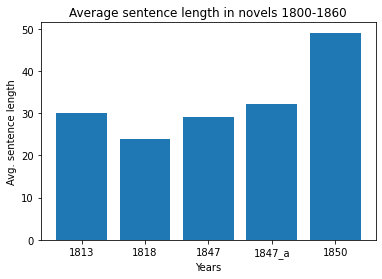

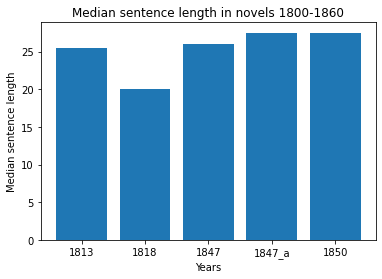

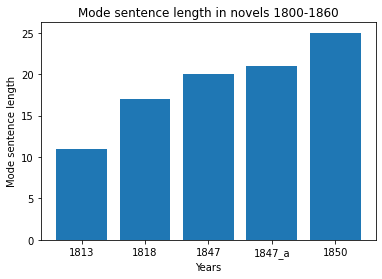

In [28]:
#Visualization for how average sentence length changed
from matplotlib import pyplot as plt
x = ["1813", "1818", "1847", "1847_a", "1850"]
y = [mean_1813, mean_1818, mean_1847, mean_1847_a, mean_1850]
plt.bar(x, y)
#addlabels(x, y)
plt.xlabel("Years")
plt.ylabel("Avg. sentence length")
plt.title('Average sentence length in novels 1800-1860')
plt.show()

#Visualization for how median sentence length changed
x = ["1813", "1818", "1847", "1847_a", "1850"]
y = [median_1813, median_1818, median_1847, median_1847_a, median_1850]
plt.bar(x, y)
#addlabels(x, y)
plt.xlabel("Years")
plt.ylabel("Median sentence length")
plt.title('Median sentence length in novels 1800-1860')
plt.show()

#Visualization for how mode sentence length changed
x = ["1813", "1818", "1847", "1847_a", "1850"]
y = [mode_1813, mode_1818, mode_1847, mode_1847_a, mode_1850]
plt.bar(x, y)
#addlabels(x, y)
plt.xlabel("Years")
plt.ylabel("Mode sentence length")
plt.title('Mode sentence length in novels 1800-1860')
plt.show()



Noun count for 1813:  259
Noun count for 1818:  272
Noun count for 1847:  290
Noun count for 1847_a:  340
Noun count for 1850:  526


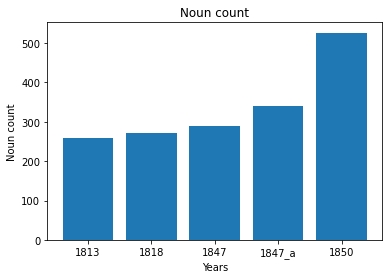

In [29]:


from nltk import chunk

N= 40
##=================================Nouns in 1813=============================
#create a list of N sentenes
s_list_1813 = ['0'] * N
tags_1813 = []
words_1813 = []
noun_count_1813 = 0
i = 0
while i < N:
    s_list_1813[i] = sent_split_text_1813[i]
    words_1813 = words_1813 + nltk.word_tokenize(s_list_1813[i])
    i += 1
tags_1813 = nltk.pos_tag(words_1813)
for tuple in tags_1813:
    if tuple[1] == 'NNP' or tuple[1] == 'PRP' or tuple[1] == 'NN':
        noun_count_1813 += 1

print("Noun count for 1813: ", noun_count_1813)
##=================================Nouns in 1818=============================
#create a list of N sentenes
s_list_1818 = ['0'] * N
tags_1818 = []
words_1818 = []
noun_count_1818 = 0
i = 0
while i < N:
    s_list_1818[i] = sent_split_text_1818[i]
    words_1818 = words_1818 + \
    nltk.word_tokenize(s_list_1818[i])
    i += 1
tags_1818 = nltk.pos_tag(words_1818)
for tuple in tags_1818:
    if tuple[1] == 'NNP' or tuple[1] \
    == 'PRP' or tuple[1] == 'NN':
        noun_count_1818 += 1
print("Noun count for 1818: ", noun_count_1818)
##=================================Nouns in 1847=============================
#create a list of N sentenes
s_list_1847 = ['0'] * N
tags_1847 = []
words_1847 = []
noun_count_1847 = 0
i = 0
while i < N:
    s_list_1847[i] = sent_split_text_1847[i]
    words_1847 = words_1847 +\
    nltk.word_tokenize(s_list_1847[i])
    i += 1
tags_1847 = nltk.pos_tag(words_1847)
for tuple in tags_1847:
    if tuple[1] == 'NNP' or tuple[1] \
    == 'PRP' or tuple[1] == 'NN':
        noun_count_1847 += 1
print("Noun count for 1847: ", noun_count_1847)
##=================================Nouns in 1847_a=============================
#create a list of N sentenes
s_list_1847_a = ['0'] * N
tags_1847_a = []
words_1847_a = []
noun_count_1847_a = 0
i = 0
while i < N:
    s_list_1847_a[i] = sent_split_text_1847_a[i]
    words_1847_a = words_1847_a + nltk.word_tokenize(s_list_1847_a[i])
    i += 1
tags_1847_a = nltk.pos_tag(words_1847_a)
for tuple in tags_1847_a:
    if tuple[1] == 'NNP' or tuple[1] == 'PRP' or tuple[1] == 'NN':
        noun_count_1847_a += 1
print("Noun count for 1847_a: ", noun_count_1847_a)
##=================================Nouns in 1850=============================
#create a list of N sentenes
s_list_1850 = ['0'] * N
tags_1850 = []
words_1850 = []
noun_count_1850 = 0
i = 0
while i < N:
    s_list_1850[i] = sent_split_text_1850[i]
    words_1850 = words_1850 + \
    nltk.word_tokenize(s_list_1850[i])
    i += 1
tags_1850 = nltk.pos_tag(words_1850)
for tuple in tags_1850:
    if tuple[1] == 'NNP' or tuple[1] \
    == 'PRP' or tuple[1] == 'NN':
        noun_count_1850 += 1
print("Noun count for 1850: ", noun_count_1850)
#=============================Graph Nouns===================================
x = ["1813", "1818", "1847", "1847_a", "1850"]
y = [noun_count_1813, noun_count_1818, \
     noun_count_1847, noun_count_1847_a, noun_count_1850]
plt.bar(x, y)
#addlabels(x, y)
plt.xlabel("Years")
plt.ylabel("Noun count")
plt.title('Noun count')
plt.show()


Adjective count for 1813:  104
Adjective count for 1818:  70
Adjectives count for 1847:  100
Adjectives count for 1847_a:  94
Adjective count for 1850:  172


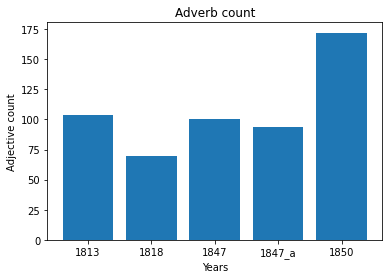

In [30]:

from nltk import chunk

N = 40

##=================================Adjectives in 1813=============================
#create a list of N sentenes
s_list_1813 = ['0'] * N
tags_1813 = []
words_1813 = []
adj_count_1813 = 0
i = 0
while i < N:
    s_list_1813[i] = sent_split_text_1813[i]
    words_1813 = words_1813 + \
    nltk.word_tokenize(s_list_1813[i])
    i += 1
tags_1813 = nltk.pos_tag(words_1813)
for tuple in tags_1813:
    if tuple[1] == 'JJ':
        adj_count_1813 += 1

print("Adjective count for 1813: ", adj_count_1813)
##=================================Adjectives in 1818=============================
#create a list of N sentenes
s_list_1818 = ['0'] * N
tags_1818 = []
words_1818 = []
adj_count_1818 = 0
i = 0
while i < N:
    s_list_1818[i] = sent_split_text_1818[i]
    words_1818 = words_1818 + \
    nltk.word_tokenize(s_list_1818[i])
    i += 1
tags_1818 = nltk.pos_tag(words_1818)
for tuple in tags_1818:
    if tuple[1] == 'JJ':
        adj_count_1818 += 1
print("Adjective count for 1818: ", adj_count_1818)
##=================================Adjectives in 1847=============================
#create a list of N sentenes
s_list_1847 = ['0'] * N
tags_1847 = []
words_1847 = []
adj_count_1847 = 0
i = 0
while i < N:
    s_list_1847[i] = sent_split_text_1847[i]
    words_1847 = words_1847 + \
    nltk.word_tokenize(s_list_1847[i])
    i += 1
tags_1847 = nltk.pos_tag(words_1847)
for tuple in tags_1847:
    if tuple[1] == 'JJ':
        adj_count_1847 += 1
print("Adjectives count for 1847: ", adj_count_1847)
##=================================Adjectives in 1847_a=============================
#create a list of N sentenes
s_list_1847_a = ['0'] * N
tags_1847_a = []
words_1847_a = []
adj_count_1847_a = 0
i = 0
while i < N:
    s_list_1847_a[i] = sent_split_text_1847_a[i]
    words_1847_a = words_1847_a + \
    nltk.word_tokenize(s_list_1847_a[i])
    i += 1
tags_1847_a = nltk.pos_tag(words_1847_a)
for tuple in tags_1847_a:
    if tuple[1] == 'JJ':
        adj_count_1847_a += 1
print("Adjectives count for 1847_a: ", adj_count_1847_a)
##=================================Adjectives in 1850=============================
#create a list of N sentenes
s_list_1850 = ['0'] * N
tags_1850 = []
words_1850 = []
adj_count_1850 = 0
i = 0
while i < N:
    s_list_1850[i] = sent_split_text_1850[i]
    words_1850 = words_1850 + \
    nltk.word_tokenize(s_list_1850[i])
    i += 1
tags_1850 = nltk.pos_tag(words_1850)
for tuple in tags_1850:
    if tuple[1] == 'JJ':
        adj_count_1850 += 1
print("Adjective count for 1850: ", adj_count_1850)
#================================================================
x = ["1813", "1818", "1847", "1847_a", "1850"]
y = [adj_count_1813, adj_count_1818, \
     adj_count_1847, adj_count_1847_a, adj_count_1850]
plt.bar(x, y)
#addlabels(x, y)
plt.xlabel("Years")
plt.ylabel("Adjective count")
plt.title('Adverb count')
plt.show()



Adverb count for 1813:  66
Adverb count for 1818:  30
Adverb count for 1847:  65
Adverb count for 1847_a:  91
Adverb count for 1850:  119


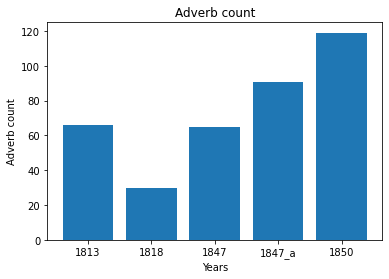

In [31]:

from nltk import chunk
N = 40

##=================================Adverbs in 1813=============================
#create a list of N sentenes
s_list_1813 = ['0'] * N
tags_1813 = []
words_1813 = []
adv_count_1813 = 0
i = 0
while i < N:
    s_list_1813[i] = sent_split_text_1813[i]
    words_1813 = words_1813 + \
    nltk.word_tokenize(s_list_1813[i])
    i += 1
tags_1813 = nltk.pos_tag(words_1813)
for tuple in tags_1813:
    if tuple[1] == 'RB':
        adv_count_1813 += 1

print("Adverb count for 1813: ", adv_count_1813)
##=================================Adverbs in 1818=============================
#create a list of N sentenes
s_list_1818 = ['0'] * N
tags_1818 = []
words_1818 = []
adv_count_1818 = 0
i = 0
while i < N:
    s_list_1818[i] = sent_split_text_1818[i]
    words_1818 = words_1818 + \
    nltk.word_tokenize(s_list_1818[i])
    i += 1
tags_1818 = nltk.pos_tag(words_1818)
for tuple in tags_1818:
    if tuple[1] == 'RB':
        adv_count_1818 += 1
print("Adverb count for 1818: ", adv_count_1818)
##=================================Adverbs in 1847=============================
#create a list of N sentenes
s_list_1847 = ['0'] * N
tags_1847 = []
words_1847 = []
adv_count_1847 = 0
i = 0
while i < N:
    s_list_1847[i] = sent_split_text_1847[i]
    words_1847 = words_1847 + \
    nltk.word_tokenize(s_list_1847[i])
    i += 1
tags_1847 = nltk.pos_tag(words_1847)
for tuple in tags_1847:
    if tuple[1] == 'RB':
        adv_count_1847 += 1
print("Adverb count for 1847: ", adv_count_1847)
##=================================Adverbs in 1847_a=============================
#create a list of N sentenes
s_list_1847_a = ['0'] * N
tags_1847_a = []
words_1847_a = []
adv_count_1847_a = 0
i = 0
while i < N:
    s_list_1847_a[i] = sent_split_text_1847_a[i]
    words_1847_a = words_1847_a +\
    nltk.word_tokenize(s_list_1847_a[i])
    i += 1
tags_1847_a = nltk.pos_tag(words_1847_a)
for tuple in tags_1847_a:
    if tuple[1] == 'RB':
        adv_count_1847_a += 1
print("Adverb count for 1847_a: ", adv_count_1847_a)
##=================================Adverbs in 1850=============================
#create a list of N sentenes
s_list_1850 = ['0'] * N
tags_1850 = []
words_1850 = []
adv_count_1850 = 0
i = 0
while i < N:
    s_list_1850[i] = sent_split_text_1850[i]
    words_1850 = words_1850 + \
    nltk.word_tokenize(s_list_1850[i])
    i += 1
tags_1850 = nltk.pos_tag(words_1850)
for tuple in tags_1850:
    if tuple[1] == 'RB':
        adv_count_1850 += 1
print("Adverb count for 1850: ", adv_count_1850)
#================================================================
x = ["1813", "1818", "1847", "1847_a", "1850"]
y = [adv_count_1813, adv_count_1818, \
     adv_count_1847, adv_count_1847_a, adv_count_1850]
plt.bar(x, y)
#addlabels(x, y)
plt.xlabel("Years")
plt.ylabel("Adverb count")
plt.title('Adverb count')
plt.show()



Verb count for 1813:  30
Verb count for 1818:  17
Verb count for 1847:  34
Verb count for 1847_a:  38
Verb count for 1850:  58


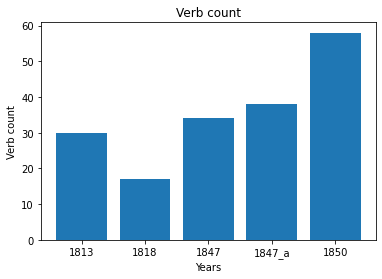

In [32]:

from nltk import chunk
N = 40

##=================================Verbs in 1813=============================
#create a list of N sentenes
s_list_1813 = ['0'] * N
tags_1813 = []
words_1813 = []
v_count_1813 = 0
i = 0
while i < N:
    s_list_1813[i] = sent_split_text_1813[i]
    words_1813 = words_1813 + \
    nltk.word_tokenize(s_list_1813[i])
    i += 1
tags_1813 = nltk.pos_tag(words_1813)
for tuple in tags_1813:
    if tuple[1] == 'VBG':
        v_count_1813 += 1

print("Verb count for 1813: ", v_count_1813)
##=================================Verbs in 1818=============================
#create a list of N sentenes
s_list_1818 = ['0'] * N
tags_1818 = []
words_1818 = []
v_count_1818 = 0
i = 0
while i < N:
    s_list_1818[i] = sent_split_text_1818[i]
    words_1818 = words_1818 + \
    nltk.word_tokenize(s_list_1818[i])
    i += 1
tags_1818 = nltk.pos_tag(words_1818)
for tuple in tags_1818:
    if tuple[1] == 'VBG':
        v_count_1818 += 1
print("Verb count for 1818: ", v_count_1818)
##=================================Verbs in 1847=============================
#create a list of N sentenes
s_list_1847 = ['0'] * N
tags_1847 = []
words_1847 = []
v_count_1847 = 0
i = 0
while i < N:
    s_list_1847[i] = sent_split_text_1847[i]
    words_1847 = words_1847 + nltk.word_tokenize(s_list_1847[i])
    i += 1
tags_1847 = nltk.pos_tag(words_1847)
for tuple in tags_1847:
    if tuple[1] == 'VBG':
        v_count_1847 += 1
print("Verb count for 1847: ", v_count_1847)
##=================================Verbs in 1847_a=============================
#create a list of N sentenes
s_list_1847_a = ['0'] * N
tags_1847_a = []
words_1847_a = []
v_count_1847_a = 0
i = 0
while i < N:
    s_list_1847_a[i] = sent_split_text_1847_a[i]
    words_1847_a = words_1847_a +\
    nltk.word_tokenize(s_list_1847_a[i])
    i += 1
tags_1847_a = nltk.pos_tag(words_1847_a)
for tuple in tags_1847_a:
    if tuple[1] == 'VBG':
        v_count_1847_a += 1
print("Verb count for 1847_a: ", v_count_1847_a)
##=================================Verbs in 1850=============================
#create a list of N sentenes
s_list_1850 = ['0'] * N
tags_1850 = []
words_1850 = []
v_count_1850 = 0
i = 0
while i < N:
    s_list_1850[i] = sent_split_text_1850[i]
    words_1850 = words_1850 + \
    nltk.word_tokenize(s_list_1850[i])
    i += 1
tags_1850 = nltk.pos_tag(words_1850)
for tuple in tags_1850:
    if tuple[1] == 'VBG':
        v_count_1850 += 1
print("Verb count for 1850: ", v_count_1850)
#================================================================
x = ["1813", "1818", "1847", "1847_a", "1850"]
y = [v_count_1813, v_count_1818, \
     v_count_1847, v_count_1847_a, v_count_1850]
plt.bar(x, y)
#addlabels(x, y)
plt.xlabel("Years")
plt.ylabel("Verb count")
plt.title('Verb count')
plt.show()


# Parts of Speech Data for 1860 - 1914

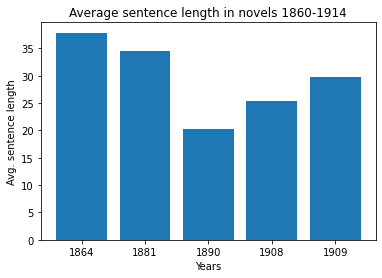

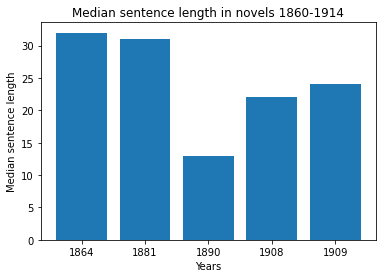

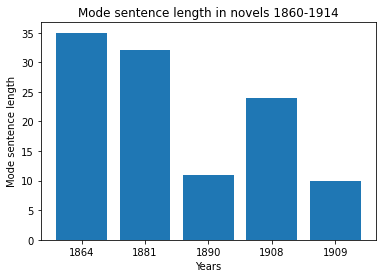

In [33]:
#Visualization for how average sentence length changed 1860 to 1914 Era
from matplotlib import pyplot as plt
x = ["1864", "1881", "1890", "1908", "1909"]
y = [mean_1864, mean_1881, \
     mean_1890, mean_1908, mean_1909]
plt.bar(x, y)
#addlabels(x, y)
plt.xlabel("Years")
plt.ylabel("Avg. sentence length")
plt.title('Average sentence length in novels 1860-1914')
plt.show()

#Visualization for how median sentence length changed
x = ["1864", "1881", "1890", "1908", "1909"]
y = [median_1864, median_1881, \
     median_1890, median_1908, median_1909]
plt.bar(x, y)
#addlabels(x, y)
plt.xlabel("Years")
plt.ylabel("Median sentence length")
plt.title('Median sentence length in novels 1860-1914')
plt.show()

#Visualization for how mode sentence length changed
x = ["1864", "1881", "1890", "1908", "1909"]
y = [mode_1864, mode_1881, \
     mode_1890, mode_1908, mode_1909]
plt.bar(x, y)
#addlabels(x, y)
plt.xlabel("Years")
plt.ylabel("Mode sentence length")
plt.title('Mode sentence length in novels 1860-1914')
plt.show()

In [34]:
#My little cheat sheet for abbreviations for parts of speech :)
#https://medium.com/fintechexplained/nlp-text-part-of-speech-tagging-80e30b53e05d
from nltk import chunk
import nltk
nltk.download('averaged_perceptron_tagger')
text = 'where is the fluffy cat and bunny running happily'
words = nltk.word_tokenize(text)
tags = nltk.pos_tag(words)
print(tags)

[('where', 'WRB'), ('is', 'VBZ'), ('the', 'DT'), ('fluffy', 'JJ'), ('cat', 'NN'), ('and', 'CC'), ('bunny', 'NN'), ('running', 'VBG'), ('happily', 'RB')]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\daria\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Noun count for 1864:  529
Noun count for 1881:  431
Noun count for 1890:  272
Noun count for 1908:  382
Noun count for 1909:  329


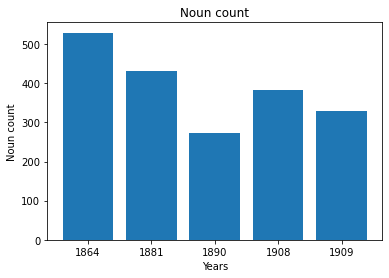

In [35]:
from nltk import chunk

##=================================Nouns in 1864=============================
#create a list of 50 sentenes
s_list_1864 = ['0'] * 50
tags_1864 = []
words_1864 = []
noun_count_1864 = 0
i = 0
while i < 50:
    s_list_1864[i] = sent_split_text_1864[i]
    words_1864 = words_1864 + \
    nltk.word_tokenize(s_list_1864[i])
    i += 1
tags_1864 = nltk.pos_tag(words_1864)
for tuple in tags_1864:
    if tuple[1] == 'NNP' or tuple[1] == 'PRP' or tuple[1] == 'NN':
        noun_count_1864 += 1

print("Noun count for 1864: ", noun_count_1864)
##=================================Nouns in 1881=============================
#create a list of 50 sentenes
s_list_1881 = ['0'] * 50
tags_1881 = []
words_1881 = []
noun_count_1881 = 0
i = 0
while i < 50:
    s_list_1881[i] = sent_split_text_1881[i]
    words_1881 = words_1881 + \
    nltk.word_tokenize(s_list_1881[i])
    i += 1
tags_1881 = nltk.pos_tag(words_1881)
for tuple in tags_1881:
    if tuple[1] == 'NNP' or tuple[1] == 'PRP' or tuple[1] == 'NN':
        noun_count_1881 += 1
print("Noun count for 1881: ", noun_count_1881)
##=================================Nouns in 1890=============================
#create a list of 50 sentenes
s_list_1890 = ['0'] * 50
tags_1890 = []
words_1890 = []
noun_count_1890 = 0
i = 0
while i < 50:
    s_list_1890[i] = sent_split_text_1890[i]
    words_1890 = words_1890 + \
    nltk.word_tokenize(s_list_1890[i])
    i += 1
tags_1890 = nltk.pos_tag(words_1890)
for tuple in tags_1890:
    if tuple[1] == 'NNP' or tuple[1] == 'PRP' or tuple[1] == 'NN':
        noun_count_1890 += 1
print("Noun count for 1890: ", noun_count_1890)
##=================================Nouns in 1908=============================
#create a list of 50 sentenes
s_list_1908 = ['0'] * 50
tags_1908 = []
words_1908 = []
noun_count_1908 = 0
i = 0
while i < 50:
    s_list_1908[i] = sent_split_text_1908[i]
    words_1908 = words_1908 + \
    nltk.word_tokenize(s_list_1908[i])
    i += 1
tags_1908 = nltk.pos_tag(words_1908)
for tuple in tags_1908:
    if tuple[1] == 'NNP' or tuple[1] == 'PRP' or tuple[1] == 'NN':
        noun_count_1908 += 1
print("Noun count for 1908: ", noun_count_1908)
##=================================Nouns in 1909=============================
#create a list of 50 sentenes
s_list_1909 = ['0'] * 50
tags_1909 = []
words_1909 = []
noun_count_1909 = 0
i = 0
while i < 50:
    s_list_1909[i] = sent_split_text_1909[i]
    words_1909 = words_1909 + \
    nltk.word_tokenize(s_list_1909[i])
    i += 1
tags_1909 = nltk.pos_tag(words_1909)
for tuple in tags_1909:
    if tuple[1] == 'NNP' or tuple[1] == 'PRP' or tuple[1] == 'NN':
        noun_count_1909 += 1
print("Noun count for 1909: ", noun_count_1909)
#=============================Graph Nouns===================================
x = ["1864", "1881", "1890", "1908", "1909"]
y = [noun_count_1864, noun_count_1881,\
     noun_count_1890, noun_count_1908, noun_count_1909]
plt.bar(x, y)
#addlabels(x, y)
plt.xlabel("Years")
plt.ylabel("Noun count")
plt.title('Noun count')
plt.show()

Adjective count for 1864:  152
Adjective count for 1881:  183
Adjectives count for 1890:  111
Adjectives count for 1908:  128
Adjective count for 1909:  121


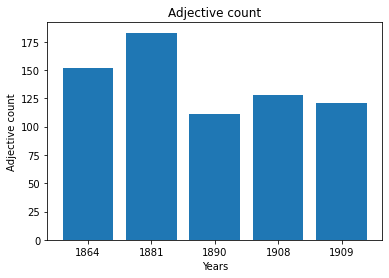

In [36]:
from nltk import chunk

##=================================Adjectives in 1864=============================
#create a list of 50 sentenes
s_list_1864 = ['0'] * 50
tags_1864 = []
words_1864 = []
adj_count_1864 = 0
i = 0
while i < 50:
    s_list_1864[i] = sent_split_text_1864[i]
    words_1864 = words_1864 + \
    nltk.word_tokenize(s_list_1864[i])
    i += 1
tags_1864 = nltk.pos_tag(words_1864)
for tuple in tags_1864:
    if tuple[1] == 'JJ':
        adj_count_1864 += 1

print("Adjective count for 1864: ", adj_count_1864)
##=================================Adjectives in 1881=============================
#create a list of 50 sentenes
s_list_1881 = ['0'] * 50
tags_1881 = []
words_1881 = []
adj_count_1881 = 0
i = 0
while i < 50:
    s_list_1881[i] = sent_split_text_1881[i]
    words_1881 = words_1881 + \
    nltk.word_tokenize(s_list_1881[i])
    i += 1
tags_1881 = nltk.pos_tag(words_1881)
for tuple in tags_1881:
    if tuple[1] == 'JJ':
        adj_count_1881 += 1
print("Adjective count for 1881: ", adj_count_1881)
##=================================Adjectives in 1890=============================
#create a list of 50 sentenes
s_list_1890 = ['0'] * 50
tags_1890 = []
words_1890 = []
adj_count_1890 = 0
i = 0
while i < 50:
    s_list_1890[i] = sent_split_text_1890[i]
    words_1890 = words_1890 + \
    nltk.word_tokenize(s_list_1890[i])
    i += 1
tags_1890 = nltk.pos_tag(words_1890)
for tuple in tags_1890:
    if tuple[1] == 'JJ':
        adj_count_1890 += 1
print("Adjectives count for 1890: ", adj_count_1890)
##=================================Adjectives in 1908=============================
#create a list of 50 sentenes
s_list_1908 = ['0'] * 50
tags_1908 = []
words_1908 = []
adj_count_1908 = 0
i = 0
while i < 50:
    s_list_1908[i] = sent_split_text_1908[i]
    words_1908 = words_1908 + \
    nltk.word_tokenize(s_list_1908[i])
    i += 1
tags_1908 = nltk.pos_tag(words_1908)
for tuple in tags_1908:
    if tuple[1] == 'JJ':
        adj_count_1908 += 1
print("Adjectives count for 1908: ", adj_count_1908)
##=================================Adjectives in 1909=============================
#create a list of 50 sentenes
s_list_1909 = ['0'] * 50
tags_1909 = []
words_1909 = []
adj_count_1909 = 0
i = 0
while i < 50:
    s_list_1909[i] = sent_split_text_1909[i]
    words_1909 = words_1909 + \
    nltk.word_tokenize(s_list_1909[i])
    i += 1
tags_1909 = nltk.pos_tag(words_1909)
for tuple in tags_1909:
    if tuple[1] == 'JJ':
        adj_count_1909 += 1
print("Adjective count for 1909: ", adj_count_1909)
#================================================================
x = ["1864", "1881", "1890", "1908", "1909"]
y = [adj_count_1864, adj_count_1881, \
     adj_count_1890, adj_count_1908, adj_count_1909]
plt.bar(x, y)
#addlabels(x, y)
plt.xlabel("Years")
plt.ylabel("Adjective count")
plt.title('Adjective count')
plt.show()

Adverb count for 1864:  96
Adverb count for 1881:  102
Adverb count for 1890:  52
Adverb count for 1908:  82
Adverb count for 1909:  50


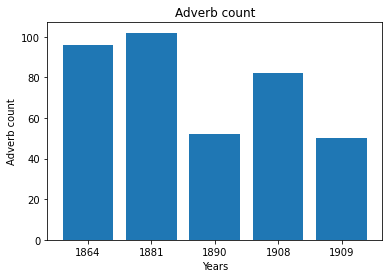

In [37]:
from nltk import chunk

##=================================Adverbs in 1864=============================
#create a list of 50 sentenes
s_list_1864 = ['0'] * 50
tags_1864 = []
words_1864 = []
adv_count_1864 = 0
i = 0
while i < 50:
    s_list_1864[i] = sent_split_text_1864[i]
    words_1864 = words_1864 + \
    nltk.word_tokenize(s_list_1864[i])
    i += 1
tags_1864 = nltk.pos_tag(words_1864)
for tuple in tags_1864:
    if tuple[1] == 'RB':
        adv_count_1864 += 1

print("Adverb count for 1864: ", adv_count_1864)
##=================================Adverbs in 1881=============================
#create a list of 50 sentenes
s_list_1881 = ['0'] * 50
tags_1881 = []
words_1881 = []
adv_count_1881 = 0
i = 0
while i < 50:
    s_list_1881[i] = sent_split_text_1881[i]
    words_1881 = words_1881 + \
    nltk.word_tokenize(s_list_1881[i])
    i += 1
tags_1881 = nltk.pos_tag(words_1881)
for tuple in tags_1881:
    if tuple[1] == 'RB':
        adv_count_1881 += 1
print("Adverb count for 1881: ", adv_count_1881)
##=================================Adverbs in 1890=============================
#create a list of 50 sentenes
s_list_1890 = ['0'] * 50
tags_1890 = []
words_1890 = []
adv_count_1890 = 0
i = 0
while i < 50:
    s_list_1890[i] = sent_split_text_1890[i]
    words_1890 = words_1890 + \
    nltk.word_tokenize(s_list_1890[i])
    i += 1
tags_1890 = nltk.pos_tag(words_1890)
for tuple in tags_1890:
    if tuple[1] == 'RB':
        adv_count_1890 += 1
print("Adverb count for 1890: ", adv_count_1890)
##=================================Adverbs in 1908=============================
#create a list of 50 sentenes
s_list_1908 = ['0'] * 50
tags_1908 = []
words_1908 = []
adv_count_1908 = 0
i = 0
while i < 50:
    s_list_1908[i] = sent_split_text_1908[i]
    words_1908 = words_1908 + \
    nltk.word_tokenize(s_list_1908[i])
    i += 1
tags_1908 = nltk.pos_tag(words_1908)
for tuple in tags_1908:
    if tuple[1] == 'RB':
        adv_count_1908 += 1
print("Adverb count for 1908: ", adv_count_1908)
##=================================Adverbs in 1909=============================
#create a list of 50 sentenes
s_list_1909 = ['0'] * 50
tags_1909 = []
words_1909 = []
adv_count_1909 = 0
i = 0
while i < 50:
    s_list_1909[i] = sent_split_text_1909[i]
    words_1909 = words_1909 + \
    nltk.word_tokenize(s_list_1909[i])
    i += 1
tags_1909 = nltk.pos_tag(words_1909)
for tuple in tags_1909:
    if tuple[1] == 'RB':
        adv_count_1909 += 1
print("Adverb count for 1909: ", adv_count_1909)
#================================================================
x = ["1864", "1881", "1890", "1908", "1909"]
y = [adv_count_1864, adv_count_1881, \
     adv_count_1890, adv_count_1908, adv_count_1909]
plt.bar(x, y)
#addlabels(x, y)
plt.xlabel("Years")
plt.ylabel("Adverb count")
plt.title('Adverb count')
plt.show()

Verb count for 1864:  45
Verb count for 1881:  27
Verb count for 1890:  21
Verb count for 1908:  40
Verb count for 1909:  20


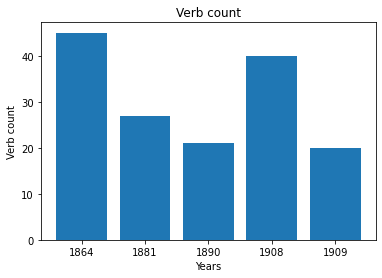

In [38]:
from nltk import chunk

##=================================Verbs in 1864=============================
#create a list of 50 sentenes
s_list_1864 = ['0'] * 50
tags_1864 = []
words_1864 = []
v_count_1864 = 0
i = 0
while i < 50:
    s_list_1864[i] = sent_split_text_1864[i]
    words_1864 = words_1864 + \
    nltk.word_tokenize(s_list_1864[i])
    i += 1
tags_1864 = nltk.pos_tag(words_1864)
for tuple in tags_1864:
    if tuple[1] == 'VBG':
        v_count_1864 += 1

print("Verb count for 1864: ", v_count_1864)
##=================================Verbs in 1881=============================
#create a list of 50 sentenes
s_list_1881 = ['0'] * 50
tags_1881 = []
words_1881 = []
v_count_1881 = 0
i = 0
while i < 50:
    s_list_1881[i] = sent_split_text_1881[i]
    words_1881 = words_1881 + \
    nltk.word_tokenize(s_list_1881[i])
    i += 1
tags_1881 = nltk.pos_tag(words_1881)
for tuple in tags_1881:
    if tuple[1] == 'VBG':
        v_count_1881 += 1
print("Verb count for 1881: ", v_count_1881)
##=================================Verbs in 1890=============================
#create a list of 50 sentenes
s_list_1890 = ['0'] * 50
tags_1890 = []
words_1890 = []
v_count_1890 = 0
i = 0
while i < 50:
    s_list_1890[i] = sent_split_text_1890[i]
    words_1890 = words_1890 + \
    nltk.word_tokenize(s_list_1890[i])
    i += 1
tags_1890 = nltk.pos_tag(words_1890)
for tuple in tags_1890:
    if tuple[1] == 'VBG':
        v_count_1890 += 1
print("Verb count for 1890: ", v_count_1890)
##=================================Verbs in 1908=============================
#create a list of 50 sentenes
s_list_1908 = ['0'] * 50
tags_1908 = []
words_1908 = []
v_count_1908 = 0
i = 0
while i < 50:
    s_list_1908[i] = sent_split_text_1908[i]
    words_1908 = words_1908 + \
    nltk.word_tokenize(s_list_1908[i])
    i += 1
tags_1908 = nltk.pos_tag(words_1908)
for tuple in tags_1908:
    if tuple[1] == 'VBG':
        v_count_1908 += 1
print("Verb count for 1908: ", v_count_1908)
##=================================Verbs in 1909=============================
#create a list of 50 sentenes
s_list_1909 = ['0'] * 50
tags_1909 = []
words_1909 = []
v_count_1909 = 0
i = 0
while i < 50:
    s_list_1909[i] = sent_split_text_1909[i]
    words_1909 = words_1909 + \
    nltk.word_tokenize(s_list_1909[i])
    i += 1
tags_1909 = nltk.pos_tag(words_1909)
for tuple in tags_1909:
    if tuple[1] == 'VBG':
        v_count_1909 += 1
print("Verb count for 1909: ", v_count_1909)
#================================================================
x = ["1864", "1881", "1890", "1908", "1909"]
y = [v_count_1864, v_count_1881, v_count_1890,\
     v_count_1908, v_count_1909]
plt.bar(x, y)
#addlabels(x, y)
plt.xlabel("Years")
plt.ylabel("Verb count")
plt.title('Verb count')
plt.show()

# Parts of Speech Data for 1914 - 1939

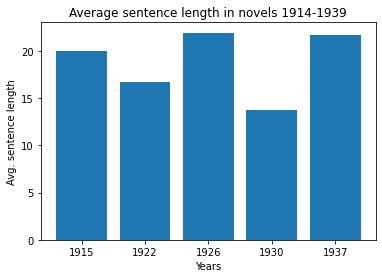

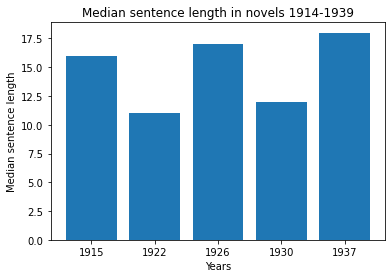

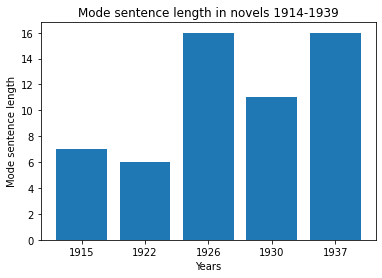

In [39]:
#Visualization for how average sentence length changed 1860 to 1914 Era
from matplotlib import pyplot as plt
x = ["1915", "1922", "1926", "1930", "1937"]
y = [mean_1915, mean_1922, mean_1926, mean_1930, mean_1937]
plt.bar(x, y)
#addlabels(x, y)
plt.xlabel("Years")
plt.ylabel("Avg. sentence length")
plt.title('Average sentence length in novels 1914-1939')
plt.show()

#Visualization for how median sentence length changed
x = ["1915", "1922", "1926", "1930", "1937"]
y = [median_1915, median_1922, median_1926, \
     median_1930, median_1937]
plt.bar(x, y)\

#addlabels(x, y)
plt.xlabel("Years")
plt.ylabel("Median sentence length")
plt.title('Median sentence length in novels 1914-1939')
plt.show()

#Visualization for how mode sentence length changed
x = ["1915", "1922", "1926", "1930", "1937"]
y = [mode_1915, mode_1922, mode_1926, \
     mode_1930, mode_1937]
plt.bar(x, y)
#addlabels(x, y)
plt.xlabel("Years")
plt.ylabel("Mode sentence length")
plt.title('Mode sentence length in novels 1914-1939')
plt.show()

Noun count for 1915:  264
Noun count for 1922:  299
Noun count for 1926:  286
Noun count for 1930:  154
Noun count for 1937:  261


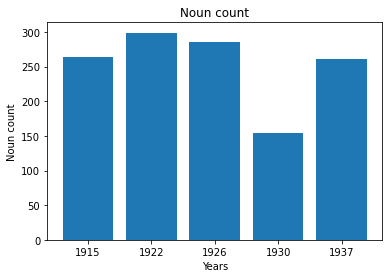

In [40]:
from nltk import chunk

##=================================Nouns in 1915=============================
#create a list of 50 sentenes
s_list_1915 = ['0'] * 50
tags_1915 = []
words_1915 = []
noun_count_1915 = 0
i = 0
while i < 50:
    s_list_1915[i] = sent_split_text_1915[i]
    words_1915 = words_1915 + \
    nltk.word_tokenize(s_list_1915[i])
    i += 1
tags_1915 = nltk.pos_tag(words_1915)
for tuple in tags_1915:
    if tuple[1] == 'NNP' or tuple[1] \
    == 'PRP' or tuple[1] == 'NN':
        noun_count_1915 += 1

print("Noun count for 1915: ", noun_count_1915)
##=================================Nouns in 1922=============================
#create a list of 50 sentenes
s_list_1922 = ['0'] * 50
tags_1922 = []
words_1922 = []
noun_count_1922 = 0
i = 0
while i < 50:
    s_list_1922[i] = sent_split_text_1922[i]
    words_1922 = words_1922 + \
    nltk.word_tokenize(s_list_1922[i])
    i += 1
tags_1922 = nltk.pos_tag(words_1922)
for tuple in tags_1922:
    if tuple[1] == 'NNP' or tuple[1] \
    == 'PRP' or tuple[1] == 'NN':
        noun_count_1922 += 1
print("Noun count for 1922: ", noun_count_1922)
##=================================Nouns in 1926=============================
#create a list of 50 sentenes
s_list_1926 = ['0'] * 50
tags_1926 = []
words_1926 = []
noun_count_1926 = 0
i = 0
while i < 50:
    s_list_1926[i] = sent_split_text_1926[i]
    words_1926 = words_1926 + \
    nltk.word_tokenize(s_list_1926[i])
    i += 1
tags_1926 = nltk.pos_tag(words_1926)
for tuple in tags_1926:
    if tuple[1] == 'NNP' or \
    tuple[1] == 'PRP' or tuple[1] == 'NN':
        noun_count_1926 += 1
print("Noun count for 1926: ", noun_count_1926)
##=================================Nouns in 1930=============================
#create a list of 50 sentenes
s_list_1930 = ['0'] * 50
tags_1930 = []
words_1930 = []
noun_count_1930 = 0
i = 0
while i < 50:
    s_list_1930[i] = sent_split_text_1930[i]
    words_1930 = words_1930 +\
    nltk.word_tokenize(s_list_1930[i])
    i += 1
tags_1930 = nltk.pos_tag(words_1930)
for tuple in tags_1930:
    if tuple[1] == 'NNP' or \
    tuple[1] == 'PRP' or tuple[1] == 'NN':
        noun_count_1930 += 1

print("Noun count for 1930: ", noun_count_1930)
##=================================Nouns in 1937=============================
#create a list of 50 sentenes
s_list_1937 = ['0'] * 50
tags_1937 = []
words_1937 = []
noun_count_1937 = 0
i = 0
while i < 50:
    s_list_1937[i] = sent_split_text_1937[i]
    words_1937 = words_1937 + \
    nltk.word_tokenize(s_list_1937[i])
    i += 1
tags_1937 = nltk.pos_tag(words_1937)
for tuple in tags_1937:
    if tuple[1] == 'NNP' or tuple[1] == 'PRP' or tuple[1] == 'NN':
        noun_count_1937 += 1

print("Noun count for 1937: ", noun_count_1937)
#=============================Graph Nouns===================================
x = ["1915", "1922", "1926", "1930", "1937"]
y = [noun_count_1915, noun_count_1922, \
     noun_count_1926, noun_count_1930, noun_count_1937]
plt.bar(x, y)
#addlabels(x, y)
plt.xlabel("Years")
plt.ylabel("Noun count")
plt.title('Noun count')
plt.show()

Adjective count for 1915:  107
Adjective count for 1922:  86
Adjectives count for 1926:  78
Adjectives count for 1930:  64
Adjective count for 1950:  107


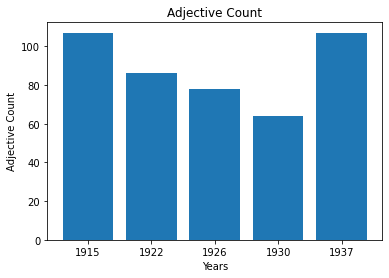

In [41]:
from nltk import chunk

##=================================Adjectives in 1915=============================
#create a list of 50 sentenes
s_list_1915 = ['0'] * 50
tags_1915 = []
words_1915 = []
adj_count_1915 = 0
i = 0
while i < 50:
    s_list_1915[i] = sent_split_text_1915[i]
    words_1915 = words_1915 + \
    nltk.word_tokenize(s_list_1915[i])
    i += 1
tags_1915 = nltk.pos_tag(words_1915)
for tuple in tags_1915:
    if tuple[1] == 'JJ':
        adj_count_1915 += 1

print("Adjective count for 1915: ", adj_count_1915)
##=================================Adjectives in 1922=============================
#create a list of 50 sentenes
s_list_1922 = ['0'] * 50
tags_1922 = []
words_1922 = []
adj_count_1922 = 0
i = 0
while i < 50:
    s_list_1922[i] = sent_split_text_1922[i]
    words_1922 = words_1922 + \
    nltk.word_tokenize(s_list_1922[i])
    i += 1
tags_1922 = nltk.pos_tag(words_1922)
for tuple in tags_1922:
    if tuple[1] == 'JJ':
        adj_count_1922 += 1
print("Adjective count for 1922: ", adj_count_1922)
##=================================Adjectives in 1926=============================
#create a list of 50 sentenes
s_list_1926 = ['0'] * 50
tags_1926 = []
words_1926 = []
adj_count_1926 = 0
i = 0
while i < 50:
    s_list_1926[i] = sent_split_text_1926[i]
    words_1926 = words_1926 + \
    nltk.word_tokenize(s_list_1926[i])
    i += 1
tags_1926 = nltk.pos_tag(words_1926)
for tuple in tags_1926:
    if tuple[1] == 'JJ':
        adj_count_1926 += 1
print("Adjectives count for 1926: ", adj_count_1926)
##=================================Adjectives in 1930=============================
#create a list of 50 sentenes
s_list_1930 = ['0'] * 50
tags_1930 = []
words_1930 = []
adj_count_1930 = 0
i = 0
while i < 50:
    s_list_1930[i] = sent_split_text_1930[i]
    words_1930 = words_1930 + \
    nltk.word_tokenize(s_list_1930[i])
    i += 1
tags_1930 = nltk.pos_tag(words_1930)
for tuple in tags_1930:
    if tuple[1] == 'JJ':
        adj_count_1930 += 1
print("Adjectives count for 1930: ", adj_count_1930)
##=================================Adjectives in 1937=============================
#create a list of 50 sentenes
s_list_1937 = ['0'] * 50
tags_1937 = []
words_1937 = []
adj_count_1937 = 0
i = 0
while i < 50:
    s_list_1937[i] = sent_split_text_1937[i]
    words_1937 = words_1937 + \
    nltk.word_tokenize(s_list_1937[i])
    i += 1
tags_1937 = nltk.pos_tag(words_1937)
for tuple in tags_1937:
    if tuple[1] == 'JJ':
        adj_count_1937 += 1
print("Adjective count for 1950: ", adj_count_1937)

#================================================================
x = ["1915", "1922", "1926", "1930", "1937"]
y = [adj_count_1915, adj_count_1922, \
     adj_count_1926, adj_count_1930, adj_count_1937]
plt.bar(x, y)
#addlabels(x, y)
plt.xlabel("Years")
plt.ylabel("Adjective Count")
plt.title('Adjective Count')
plt.show()

Adverb count for 1915:  78
Adverb count for 1940:  48
Adverb count for 1926:  75
Adverb count for 1930:  42
Adverb count for 1937:  93


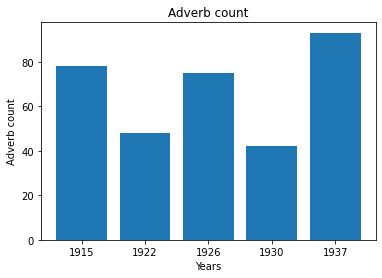

In [42]:
from nltk import chunk

##=================================Adverbs in 1915=============================
#create a list of 50 sentenes
s_list_1915 = ['0'] * 50
tags_1915 = []
words_1915 = []
adv_count_1915 = 0
i = 0
while i < 50:
    s_list_1915[i] = sent_split_text_1915[i]
    words_1915 = words_1915 + \
    nltk.word_tokenize(s_list_1915[i])
    i += 1
tags_1915 = nltk.pos_tag(words_1915)
for tuple in tags_1915:
    if tuple[1] == 'RB':
        adv_count_1915 += 1

print("Adverb count for 1915: ", adv_count_1915)
##=================================Adverbs in 1922=============================
#create a list of 50 sentenes
s_list_1922 = ['0'] * 50
tags_1922 = []
words_1922 = []
adv_count_1922 = 0
i = 0
while i < 50:
    s_list_1922[i] = sent_split_text_1922[i]
    words_1922 = words_1922 + \
    nltk.word_tokenize(s_list_1922[i])
    i += 1
tags_1922 = nltk.pos_tag(words_1922)
for tuple in tags_1922:
    if tuple[1] == 'RB':
        adv_count_1922 += 1
print("Adverb count for 1940: ", adv_count_1922)
##=================================Adverbs in 1926=============================
#create a list of 50 sentenes
s_list_1926 = ['0'] * 50
tags_1926 = []
words_1926 = []
adv_count_1926 = 0
i = 0
while i < 50:
    s_list_1926[i] = sent_split_text_1926[i]
    words_1926 = words_1926 + \
    nltk.word_tokenize(s_list_1926[i])
    i += 1
tags_1926 = nltk.pos_tag(words_1926)
for tuple in tags_1926:
    if tuple[1] == 'RB':
        adv_count_1926 += 1
print("Adverb count for 1926: ", adv_count_1926)
##=================================Adverbs in 1930=============================
#create a list of 50 sentenes
s_list_1930 = ['0'] * 50
tags_1930 = []
words_1930 = []
adv_count_1930 = 0
i = 0
while i < 50:
    s_list_1930[i] = sent_split_text_1930[i]
    words_1930 = words_1930 + \
    nltk.word_tokenize(s_list_1930[i])
    i += 1
tags_1930 = nltk.pos_tag(words_1930)
for tuple in tags_1930:
    if tuple[1] == 'RB':
        adv_count_1930 += 1
print("Adverb count for 1930: ", adv_count_1930)
##=================================Adverbs in 1937=============================
#create a list of 50 sentenes
s_list_1937 = ['0'] * 50
tags_1937 = []
words_1937 = []
adv_count_1937 = 0
i = 0
while i < 50:
    s_list_1937[i] = sent_split_text_1937[i]
    words_1937 = words_1937 + \
    nltk.word_tokenize(s_list_1937[i])
    i += 1
tags_1937 = nltk.pos_tag(words_1937)
for tuple in tags_1937:
    if tuple[1] == 'RB':
        adv_count_1937 += 1
print("Adverb count for 1937: ", adv_count_1937)
#================================================================
x = ["1915", "1922", "1926", "1930", "1937"]
y = [adv_count_1915, adv_count_1922, \
     adv_count_1926, adv_count_1930, adv_count_1937]
plt.bar(x, y)
#addlabels(x, y)
plt.xlabel("Years")
plt.ylabel("Adverb count")
plt.title('Adverb count')
plt.show()

Verb count for 1915:  17
Verb count for 1922:  41
Verb count for 1926:  22
Verb count for 1930:  17
Verb count for 1937:  22


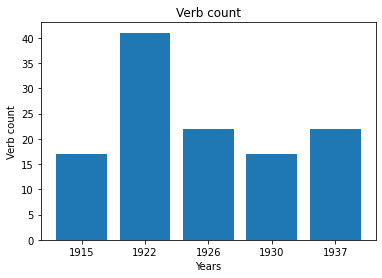

In [43]:
from nltk import chunk

##=================================Verbs in 1915=============================
#create a list of 50 sentenes
s_list_1915 = ['0'] * 50
tags_1915 = []
words_1915 = []
v_count_1915 = 0
i = 0
while i < 50:
    s_list_1915[i] = sent_split_text_1915[i]
    words_1915 = words_1915 + \
    nltk.word_tokenize(s_list_1915[i])
    i += 1
tags_1915 = nltk.pos_tag(words_1915)
for tuple in tags_1915:
    if tuple[1] == 'VBG':
        v_count_1915 += 1

print("Verb count for 1915: ", v_count_1915)
##=================================Verbs in 1922=============================
#create a list of 50 sentenes
s_list_1922 = ['0'] * 50
tags_1922 = []
words_1922 = []
v_count_1922 = 0
i = 0
while i < 50:
    s_list_1922[i] = sent_split_text_1922[i]
    words_1922 = words_1922 + \
    nltk.word_tokenize(s_list_1922[i])
    i += 1
tags_1922 = nltk.pos_tag(words_1922)
for tuple in tags_1922:
    if tuple[1] == 'VBG':
        v_count_1922 += 1
print("Verb count for 1922: ", v_count_1922)
##=================================Verbs in 1926=============================
#create a list of 50 sentenes
s_list_1926 = ['0'] * 50
tags_1926 = []
words_1926 = []
v_count_1926 = 0
i = 0
while i < 50:
    s_list_1926[i] = sent_split_text_1926[i]
    words_1926 = words_1926 + \
    nltk.word_tokenize(s_list_1926[i])
    i += 1
tags_1926 = nltk.pos_tag(words_1926)
for tuple in tags_1926:
    if tuple[1] == 'VBG':
        v_count_1926 += 1
print("Verb count for 1926: ", v_count_1926)
##=================================Verbs in 1930=============================
#create a list of 50 sentenes
s_list_1930 = ['0'] * 50
tags_1930 = []
words_1930 = []
v_count_1930 = 0
i = 0
while i < 50:
    s_list_1930[i] = sent_split_text_1930[i]
    words_1930 = words_1930 + \
    nltk.word_tokenize(s_list_1930[i])
    i += 1
tags_1930 = nltk.pos_tag(words_1930)
for tuple in tags_1930:
    if tuple[1] == 'VBG':
        v_count_1930 += 1
print("Verb count for 1930: ", v_count_1930)
##=================================Verbs in 1937=============================
#create a list of 50 sentenes
s_list_1937 = ['0'] * 50
tags_1937 = []
words_1937 = []
v_count_1937 = 0
i = 0
while i < 50:
    s_list_1937[i] = sent_split_text_1937[i]
    words_1937 = words_1937 + \
    nltk.word_tokenize(s_list_1937[i])
    i += 1
tags_1937 = nltk.pos_tag(words_1937)
for tuple in tags_1937:
    if tuple[1] == 'VBG':
        v_count_1937 += 1
print("Verb count for 1937: ", v_count_1937)
#================================================================
x = ["1915", "1922", "1926", "1930", "1937"]
y = [v_count_1915, v_count_1922, \
     v_count_1926, v_count_1930, v_count_1937]
plt.bar(x, y)
#addlabels(x, y)
plt.xlabel("Years")
plt.ylabel("Verb count")
plt.title('Verb count')
plt.show()

# Parts of Speech Data for 1939 - 1960

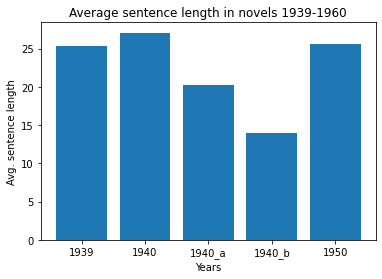

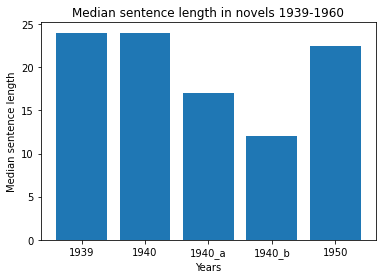

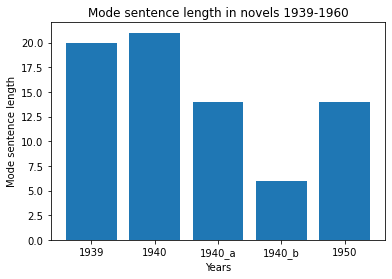

In [44]:
#Visualization for how average sentence length changed 1939 to 1960 Era
from matplotlib import pyplot as plt
x = ["1939", "1940", "1940_a", "1940_b", "1950"]
y = [mean_1939, mean_1940, mean_1940_a,\
     mean_1940_b, mean_1950]
plt.bar(x, y)
#addlabels(x, y)
plt.xlabel("Years")
plt.ylabel("Avg. sentence length")
plt.title('Average sentence length in novels 1939-1960')
plt.show()

#Visualization for how median sentence length changed
x = ["1939", "1940", "1940_a", "1940_b", "1950"]
y = [median_1939, median_1940, median_1940_a,\
     median_1940_b, median_1950]
plt.bar(x, y)
#addlabels(x, y)
plt.xlabel("Years")
plt.ylabel("Median sentence length")
plt.title('Median sentence length in novels 1939-1960')
plt.show()

#Visualization for how mode sentence length changed
x = ["1939", "1940", "1940_a", "1940_b", "1950"]
y = [mode_1939, mode_1940, mode_1940_a, \
     mode_1940_b, mode_1950]
plt.bar(x, y)
#addlabels(x, y)
plt.xlabel("Years")
plt.ylabel("Mode sentence length")
plt.title('Mode sentence length in novels 1939-1960')
plt.show()

Noun count for 1939:  299
Noun count for 1940:  263
Noun count for 1940_a:  278
Noun count for 1940_b:  207
Noun count for 1950:  281


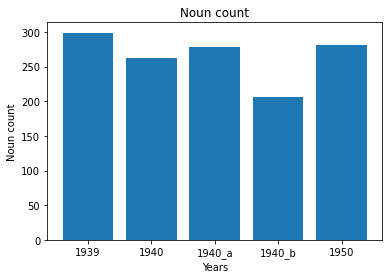

In [45]:
from nltk import chunk

##=================================Nouns in 1939=============================
#create a list of 50 sentenes
s_list_1939 = ['0'] * 50
tags_1939 = []
words_1939 = []
noun_count_1939 = 0
i = 0
while i < 50:
    s_list_1939[i] = sent_split_text_1939[i]
    words_1939 = words_1939 + \
    nltk.word_tokenize(s_list_1939[i])
    i += 1
tags_1939 = nltk.pos_tag(words_1939)
for tuple in tags_1939:
    if tuple[1] == 'NNP' or tuple[1] == 'PRP' \
    or tuple[1] == 'NN':
        noun_count_1939 += 1

print("Noun count for 1939: ", noun_count_1939)
##=================================Nouns in 1940=============================
#create a list of 50 sentenes
s_list_1940 = ['0'] * 50
tags_1940 = []
words_1940 = []
noun_count_1940 = 0
i = 0
while i < 50:
    s_list_1940[i] = sent_split_text_1940[i]
    words_1940 = words_1940 + \
    nltk.word_tokenize(s_list_1940[i])
    i += 1
tags_1940 = nltk.pos_tag(words_1940)
for tuple in tags_1940:
    if tuple[1] == 'NNP' or tuple[1] == \
    'PRP' or tuple[1] == 'NN':
        noun_count_1940 += 1
print("Noun count for 1940: ", noun_count_1940)
##=================================Nouns in 1940_a=============================
#create a list of 50 sentenes
s_list_1940_a = ['0'] * 50
tags_1940_a = []
words_1940_a = []
noun_count_1940_a = 0
i = 0
while i < 50:
    s_list_1940_a[i] = sent_split_text_1940_a[i]
    words_1940_a = words_1940_a + \
    nltk.word_tokenize(s_list_1940_a[i])
    i += 1
tags_1940_a = nltk.pos_tag(words_1940_a)
for tuple in tags_1940_a:
    if tuple[1] == 'NNP' or tuple[1] == \
    'PRP' or tuple[1] == 'NN':
        noun_count_1940_a += 1
print("Noun count for 1940_a: ", noun_count_1940_a)
##=================================Nouns in 1940_b=============================
#create a list of 50 sentenes
s_list_1940_b = ['0'] * 50
tags_1940_b = []
words_1940_b = []
noun_count_1940_b = 0
i = 0
while i < 50:
    s_list_1940_b[i] = sent_split_text_1940_b[i]
    words_1940_b = words_1940_b +\
    nltk.word_tokenize(s_list_1940_b[i])
    i += 1
tags_1940_b = nltk.pos_tag(words_1940_b)
for tuple in tags_1940_b:
    if tuple[1] == 'NNP' or tuple[1] == 'PRP' or tuple[1] == 'NN':
        noun_count_1940_b += 1

print("Noun count for 1940_b: ", noun_count_1940_b)
##=================================Nouns in 1950=============================
#create a list of 50 sentenes
s_list_1950 = ['0'] * 50
tags_1950 = []
words_1950 = []
noun_count_1950 = 0
i = 0
while i < 50:
    s_list_1950[i] = sent_split_text_1950[i]
    words_1950 = words_1950 + \
    nltk.word_tokenize(s_list_1950[i])
    i += 1
tags_1950 = nltk.pos_tag(words_1950)
for tuple in tags_1950:
    if tuple[1] == 'NNP' or tuple[1] \
    == 'PRP' or tuple[1] == 'NN':
        noun_count_1950 += 1

print("Noun count for 1950: ", noun_count_1950)
#=============================Graph Nouns===================================
x = ["1939", "1940", "1940_a", "1940_b", "1950"]
y = [noun_count_1939, noun_count_1940,\
     noun_count_1940_a, noun_count_1940_b, noun_count_1950]
plt.bar(x, y)
#addlabels(x, y)
plt.xlabel("Years")
plt.ylabel("Noun count")
plt.title('Noun count')
plt.show()

Adjective count for 1939:  154
Adjective count for 1940:  106
Adjectives count for 1940_a:  76
Adjectives count for 1940_b:  49
Adjective count for 1950:  100


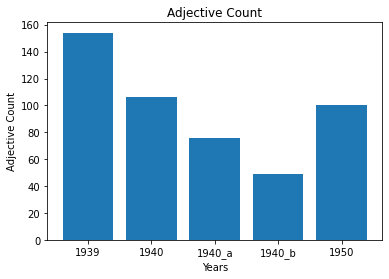

In [46]:
from nltk import chunk

##=================================Adjectives in 1939=============================
#create a list of 50 sentenes
s_list_1939 = ['0'] * 50
tags_1939 = []
words_1939 = []
adj_count_1939 = 0
i = 0
while i < 50:
    s_list_1939[i] = sent_split_text_1939[i]
    words_1939 = words_1939 + \
    nltk.word_tokenize(s_list_1939[i])
    i += 1
tags_1939 = nltk.pos_tag(words_1939)
for tuple in tags_1939:
    if tuple[1] == 'JJ':
        adj_count_1939 += 1

print("Adjective count for 1939: ", adj_count_1939)
##=================================Adjectives in 1940=============================
#create a list of 50 sentenes
s_list_1940 = ['0'] * 50
tags_1940 = []
words_1940 = []
adj_count_1940 = 0
i = 0
while i < 50:
    s_list_1940[i] = sent_split_text_1940[i]
    words_1940 = words_1940 +\
    nltk.word_tokenize(s_list_1940[i])
    i += 1
tags_1940 = nltk.pos_tag(words_1940)
for tuple in tags_1940:
    if tuple[1] == 'JJ':
        adj_count_1940 += 1
print("Adjective count for 1940: ", adj_count_1940)
##=================================Adjectives in 1940_a=============================
#create a list of 50 sentenes
s_list_1940_a = ['0'] * 50
tags_1940_a = []
words_1940_a = []
adj_count_1940_a = 0
i = 0
while i < 50:
    s_list_1940_a[i] = sent_split_text_1940_a[i]
    words_1940_a = words_1940_a + \
    nltk.word_tokenize(s_list_1940_a[i])
    i += 1
tags_1940_a = nltk.pos_tag(words_1940_a)
for tuple in tags_1940_a:
    if tuple[1] == 'JJ':
        adj_count_1940_a += 1
print("Adjectives count for 1940_a: ", adj_count_1940_a)
##=================================Adjectives in 1940_b=============================
#create a list of 50 sentenes
s_list_1940_b = ['0'] * 50
tags_1940_b = []
words_1940_b = []
adj_count_1940_b = 0
i = 0
while i < 50:
    s_list_1940_b[i] = sent_split_text_1940_b[i]
    words_1940_b = words_1940_b + \
    nltk.word_tokenize(s_list_1940_b[i])
    i += 1
tags_1940_b = nltk.pos_tag(words_1940_b)
for tuple in tags_1940_b:
    if tuple[1] == 'JJ':
        adj_count_1940_b += 1
print("Adjectives count for 1940_b: ", adj_count_1940_b)
##=================================Adjectives in 1950=============================
#create a list of 50 sentenes
s_list_1950 = ['0'] * 50
tags_1950 = []
words_1950 = []
adj_count_1950 = 0
i = 0
while i < 50:
    s_list_1950[i] = sent_split_text_1950[i]
    words_1950 = words_1950 + nltk.word_tokenize(s_list_1950[i])
    i += 1
tags_1950 = nltk.pos_tag(words_1950)
for tuple in tags_1950:
    if tuple[1] == 'JJ':
        adj_count_1950 += 1
print("Adjective count for 1950: ", adj_count_1950)

#================================================================
x = ["1939", "1940", "1940_a", "1940_b", "1950"]
y = [adj_count_1939, adj_count_1940, \
     adj_count_1940_a, adj_count_1940_b, adj_count_1950]
plt.bar(x, y)
#addlabels(x, y)
plt.xlabel("Years")
plt.ylabel("Adjective Count")
plt.title('Adjective Count')
plt.show()

Adverb count for 1939:  72
Adverb count for 1940:  77
Adverb count for 1940_a:  40
Adverb count for 1940_b:  41
Adverb count for 1950:  90


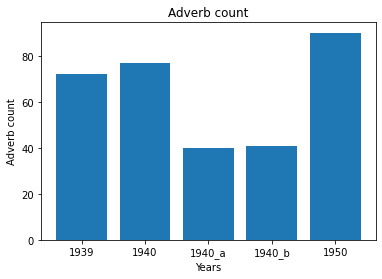

In [47]:
from nltk import chunk

##=================================Adverbs in 1939=============================
#create a list of 50 sentenes
s_list_1939 = ['0'] * 50
tags_1939 = []
words_1939 = []
adv_count_1939 = 0
i = 0
while i < 50:
    s_list_1939[i] = sent_split_text_1939[i]
    words_1939 = words_1939 + \
    nltk.word_tokenize(s_list_1939[i])
    i += 1
tags_1939 = nltk.pos_tag(words_1939)
for tuple in tags_1939:
    if tuple[1] == 'RB':
        adv_count_1939 += 1

print("Adverb count for 1939: ", adv_count_1939)
##=================================Adverbs in 1940=============================
#create a list of 50 sentenes
s_list_1940 = ['0'] * 50
tags_1940 = []
words_1940 = []
adv_count_1940 = 0
i = 0
while i < 50:
    s_list_1940[i] = sent_split_text_1940[i]
    words_1940 = words_1940 +\
    nltk.word_tokenize(s_list_1940[i])
    i += 1
tags_1940 = nltk.pos_tag(words_1940)
for tuple in tags_1940:
    if tuple[1] == 'RB':
        adv_count_1940 += 1
print("Adverb count for 1940: ", adv_count_1940)
##=================================Adverbs in 1940_a=============================
#create a list of 50 sentenes
s_list_1940_a = ['0'] * 50
tags_1940_a = []
words_1940_a = []
adv_count_1940_a = 0
i = 0
while i < 50:
    s_list_1940_a[i] = sent_split_text_1940_a[i]
    words_1940_a = words_1940_a + \
    nltk.word_tokenize(s_list_1940_a[i])
    i += 1
tags_1940_a = nltk.pos_tag(words_1940_a)
for tuple in tags_1940_a:
    if tuple[1] == 'RB':
        adv_count_1940_a += 1
print("Adverb count for 1940_a: ", adv_count_1940_a)
##=================================Adverbs in 40_b=============================
#create a list of 50 sentenes
s_list_1940_b = ['0'] * 50
tags_1940_b = []
words_1940_b = []
adv_count_1940_b = 0
i = 0
while i < 50:
    s_list_1940_b[i] = sent_split_text_1940_b[i]
    words_1940_b = words_1940_b + \
    nltk.word_tokenize(s_list_1940_b[i])
    i += 1
tags_1940_b = nltk.pos_tag(words_1940_b)
for tuple in tags_1940_b:
    if tuple[1] == 'RB':
        adv_count_1940_b += 1
print("Adverb count for 1940_b: ", adv_count_1940_b)
##=================================Adverbs in 1950=============================
#create a list of 50 sentenes
s_list_1950 = ['0'] * 50
tags_1950 = []
words_1950 = []
adv_count_1950 = 0
i = 0
while i < 50:
    s_list_1950[i] = sent_split_text_1950[i]
    words_1950 = words_1950 + \
    nltk.word_tokenize(s_list_1950[i])
    i += 1
tags_1950 = nltk.pos_tag(words_1950)
for tuple in tags_1950:
    if tuple[1] == 'RB':
        adv_count_1950 += 1
print("Adverb count for 1950: ", adv_count_1950)
#================================================================
x = ["1939", "1940", "1940_a", "1940_b", "1950"]
y = [adv_count_1939, adv_count_1940, \
     adv_count_1940_a, adv_count_1940_b, adv_count_1950]
plt.bar(x, y)
#addlabels(x, y)
plt.xlabel("Years")
plt.ylabel("Adverb count")
plt.title('Adverb count')
plt.show()

Verb count for 1939:  33
Verb count for 1940:  14
Verb count for 1940_a:  16
Verb count for 1940_b:  17
Verb count for 1950:  26


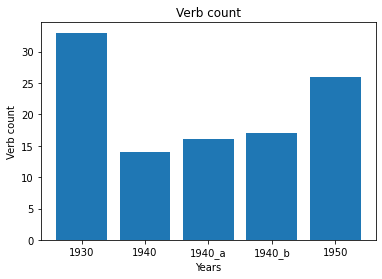

In [48]:
from nltk import chunk

##=================================Verbs in 1939=============================
#create a list of 50 sentenes
s_list_1939 = ['0'] * 50
tags_1939 = []
words_1939 = []
v_count_1939 = 0
i = 0
while i < 50:
    s_list_1939[i] = sent_split_text_1939[i]
    words_1939 = words_1939 + \
    nltk.word_tokenize(s_list_1939[i])
    i += 1
tags_1939 = nltk.pos_tag(words_1939)
for tuple in tags_1939:
    if tuple[1] == 'VBG':
        v_count_1939 += 1

print("Verb count for 1939: ", v_count_1939)
##=================================Verbs in 1940=============================
#create a list of 50 sentenes
s_list_1940 = ['0'] * 50
tags_1940 = []
words_1940 = []
v_count_1940 = 0
i = 0
while i < 50:
    s_list_1940[i] = sent_split_text_1940[i]
    words_1940 = words_1940 + \
    nltk.word_tokenize(s_list_1940[i])
    i += 1
tags_1940 = nltk.pos_tag(words_1940)
for tuple in tags_1940:
    if tuple[1] == 'VBG':
        v_count_1940 += 1
print("Verb count for 1940: ", v_count_1940)
##=================================Verbs in 1940_a=============================
#create a list of 50 sentenes
s_list_1940_a = ['0'] * 50
tags_1940_a = []
words_1940_a = []
v_count_1940_a = 0
i = 0
while i < 50:
    s_list_1940_a[i] = sent_split_text_1940_a[i]
    words_1940_a = words_1940_a +\
    nltk.word_tokenize(s_list_1940_a[i])
    i += 1
tags_1940_a = nltk.pos_tag(words_1940_a)
for tuple in tags_1940_a:
    if tuple[1] == 'VBG':
        v_count_1940_a += 1
print("Verb count for 1940_a: ", v_count_1940_a)
##=================================Verbs in 1940_b=============================
#create a list of 50 sentenes
s_list_1940_b = ['0'] * 50
tags_1940_b = []
words_1940_b = []
v_count_1940_b = 0
i = 0
while i < 50:
    s_list_1940_b[i] = sent_split_text_1940_b[i]
    words_1940_b = words_1940_b + \
    nltk.word_tokenize(s_list_1940_b[i])
    i += 1
tags_1940_b = nltk.pos_tag(words_1940_b)
for tuple in tags_1940_b:
    if tuple[1] == 'VBG':
        v_count_1940_b += 1
print("Verb count for 1940_b: ", v_count_1940_b)
##=================================Verbs in 1950=============================
#create a list of 50 sentenes
s_list_1950 = ['0'] * 50
tags_1950 = []
words_1950 = []
v_count_1950 = 0
i = 0
while i < 50:
    s_list_1950[i] = sent_split_text_1950[i]
    words_1950 = words_1950 + \
    nltk.word_tokenize(s_list_1950[i])
    i += 1
tags_1950 = nltk.pos_tag(words_1950)
for tuple in tags_1950:
    if tuple[1] == 'VBG':
        v_count_1950 += 1
print("Verb count for 1950: ", v_count_1950)
#================================================================
x = ["1930", "1940", "1940_a", "1940_b", "1950"]
y = [v_count_1939, v_count_1940, v_count_1940_a, \
     v_count_1940_b, v_count_1950]
plt.bar(x, y)
#addlabels(x, y)
plt.xlabel("Years")
plt.ylabel("Verb count")
plt.title('Verb count')
plt.show()

# Parts of Speech Data for 1960 - Present Era

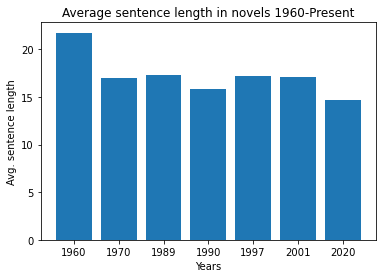

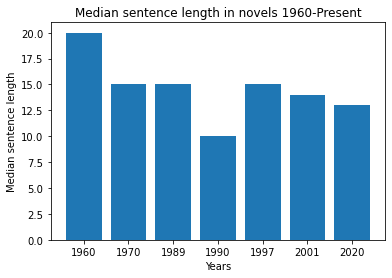

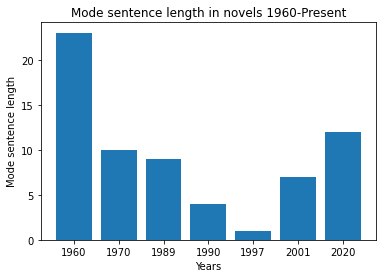

In [49]:
#Visualization for how average sentence length changed 1960 to Present Era
from matplotlib import pyplot as plt
x = ["1960","1970","1989","1990","1997","2001","2020"]
y = [mean_1960, mean_1970, mean_1989, \
     mean_1990, mean_1997, mean_2001, mean_2020]
plt.bar(x, y)
#addlabels(x, y)
plt.xlabel("Years")
plt.ylabel("Avg. sentence length")
plt.title('Average sentence length in novels 1960-Present')
plt.show()

#Visualization for how median sentence length changed
x = ["1960","1970","1989","1990","1997","2001","2020"]
y = [median_1960, median_1970, median_1989,\
     median_1990, median_1997, median_2001, median_2020]
plt.bar(x, y)
#addlabels(x, y)
plt.xlabel("Years")
plt.ylabel("Median sentence length")
plt.title('Median sentence length in novels 1960-Present')
plt.show()

#Visualization for how mode sentence length changed
x = ["1960","1970","1989","1990","1997","2001","2020"]
y = [mode_1960, mode_1970, mode_1989, mode_1990,\
     mode_1997, mode_2001, mode_2020]
plt.bar(x, y)
#addlabels(x, y)
plt.xlabel("Years")
plt.ylabel("Mode sentence length")
plt.title('Mode sentence length in novels 1960-Present')
plt.show()

Noun count for 1960:  314
Noun count for 1970:  211
Noun count for 1989:  263
Noun count for 1990:  245
Noun count for 1997:  203
Noun count for 2001:  248
Noun count for 2020:  181


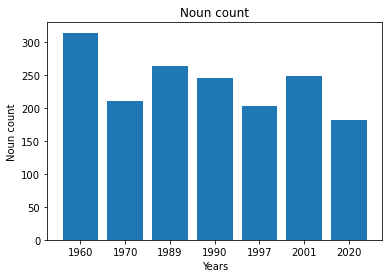

In [50]:
from nltk import chunk

##=================================Nouns in 1960=============================
#create a list of 50 sentenes
s_list_1960 = ['0'] * 50
tags_1960 = []
words_1960 = []
noun_count_1960 = 0
i = 0
while i < 50:
    s_list_1960[i] = sent_split_text_1960[i]
    words_1960 = words_1960 + \
    nltk.word_tokenize(s_list_1960[i])
    i += 1
tags_1960 = nltk.pos_tag(words_1960)
for tuple in tags_1960:
    if tuple[1] == 'NNP' or tuple[1] \
    == 'PRP' or tuple[1] == 'NN':
        noun_count_1960 += 1

print("Noun count for 1960: ", noun_count_1960)
##=================================Nouns in 1970=============================
#create a list of 50 sentenes
s_list_1970 = ['0'] * 50
tags_1970 = []
words_1970 = []
noun_count_1970 = 0
i = 0
while i < 50:
    s_list_1970[i] = sent_split_text_1970[i]
    words_1970 = words_1970 + \
    nltk.word_tokenize(s_list_1970[i])
    i += 1
tags_1970 = nltk.pos_tag(words_1970)
for tuple in tags_1970:
    if tuple[1] == 'NNP' or tuple[1] \
    == 'PRP' or tuple[1] == 'NN':
        noun_count_1970 += 1
print("Noun count for 1970: ", noun_count_1970)
##=================================Nouns in 1989=============================
#create a list of 50 sentenes
s_list_1989 = ['0'] * 50
tags_1989 = []
words_1989 = []
noun_count_1989 = 0
i = 0
while i < 50:
    s_list_1989[i] = sent_split_text_1989[i]
    words_1989 = words_1989 + nltk.word_tokenize(s_list_1989[i])
    i += 1
tags_1989 = nltk.pos_tag(words_1989)
for tuple in tags_1989:
    if tuple[1] == 'NNP' or tuple[1] == 'PRP' or tuple[1] == 'NN':
        noun_count_1989 += 1
print("Noun count for 1989: ", noun_count_1989)
##=================================Nouns in 1990=============================
#create a list of 50 sentenes
s_list_1990 = ['0'] * 50
tags_1990 = []
words_1990 = []
noun_count_1990 = 0
i = 0
while i < 50:
    s_list_1990[i] = sent_split_text_1990[i]
    words_1990 = words_1990 + nltk.word_tokenize(s_list_1990[i])
    i += 1
tags_1990 = nltk.pos_tag(words_1990)
for tuple in tags_1990:
    if tuple[1] == 'NNP' or tuple[1] == \
    'PRP' or tuple[1] == 'NN':
        noun_count_1990 += 1

print("Noun count for 1990: ", noun_count_1990)
##=================================Nouns in 1997=============================
#create a list of 50 sentenes
s_list_1997 = ['0'] * 50
tags_1997 = []
words_1997 = []
noun_count_1997 = 0
i = 0
while i < 50:
    s_list_1997[i] = sent_split_text_1997[i]
    words_1997 = words_1997 + \
    nltk.word_tokenize(s_list_1997[i])
    i += 1
tags_1997 = nltk.pos_tag(words_1997)
for tuple in tags_1997:
    if tuple[1] == 'NNP' or tuple[1] == \
    'PRP' or tuple[1] == 'NN':
        noun_count_1997 += 1

print("Noun count for 1997: ", noun_count_1997)
##=================================Nouns in 2001=============================
#create a list of 50 sentenes
s_list_2001 = ['0'] * 50
tags_2001 = []
words_2001 = []
noun_count_2001 = 0
i = 0
while i < 50:
    s_list_2001[i] = sent_split_text_2001[i]
    words_2001 = words_2001 + nltk.word_tokenize(s_list_2001[i])
    i += 1
tags_2001 = nltk.pos_tag(words_2001)
for tuple in tags_2001:
    if tuple[1] == 'NNP' or tuple[1] == \
    'PRP' or tuple[1] == 'NN':
        noun_count_2001 += 1

print("Noun count for 2001: ", noun_count_2001)
##=================================Nouns in 2020=============================
#create a list of 50 sentenes
s_list_2020 = ['0'] * 50
tags_2020 = []
words_2020 = []
noun_count_2020 = 0
i = 0
while i < 50:
    s_list_2020[i] = sent_split_text_2020[i]
    words_2020 = words_2020 + nltk.word_tokenize(s_list_2020[i])
    i += 1
tags_2020 = nltk.pos_tag(words_2020)
for tuple in tags_2020:
    if tuple[1] == 'NNP' or tuple[1] == \
    'PRP' or tuple[1] == 'NN':
        noun_count_2020 += 1

print("Noun count for 2020: ", noun_count_2020)
#=============================Graph Nouns===================================
x = ["1960", "1970", "1989", "1990", "1997","2001","2020"]
y = [noun_count_1960, noun_count_1970, noun_count_1989,\
     noun_count_1990, noun_count_1997,noun_count_2001,noun_count_2020]
plt.bar(x, y)
#addlabels(x, y)
plt.xlabel("Years")
plt.ylabel("Noun count")
plt.title('Noun count')
plt.show()

Adjective count for 1960:  93
Adjective count for 1970:  68
Adjectives count for 1989:  79
Adjectives count for 1908:  80
Adjective count for 1997:  63
Adjective count for 2001:  104
Adjective count for 2020:  49


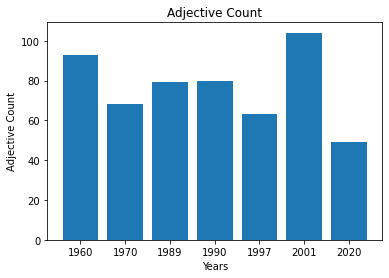

In [51]:
from nltk import chunk

##=================================Adjectives in 1960=============================
#create a list of 50 sentenes
s_list_1960 = ['0'] * 50
tags_1960 = []
words_1960 = []
adj_count_1960 = 0
i = 0
while i < 50:
    s_list_1960[i] = sent_split_text_1960[i]
    words_1960 = words_1960 + nltk.word_tokenize(s_list_1960[i])
    i += 1
tags_1960 = nltk.pos_tag(words_1960)
for tuple in tags_1960:
    if tuple[1] == 'JJ':
        adj_count_1960 += 1

print("Adjective count for 1960: ", adj_count_1960)
##=================================Adjectives in 1970=============================
#create a list of 50 sentenes
s_list_1970 = ['0'] * 50
tags_1970 = []
words_1970 = []
adj_count_1970 = 0
i = 0
while i < 50:
    s_list_1970[i] = sent_split_text_1970[i]
    words_1970 = words_1970 + nltk.word_tokenize(s_list_1970[i])
    i += 1
tags_1970 = nltk.pos_tag(words_1970)
for tuple in tags_1970:
    if tuple[1] == 'JJ':
        adj_count_1970 += 1
print("Adjective count for 1970: ", adj_count_1970)
##=================================Adjectives in 1989=============================
#create a list of 50 sentenes
s_list_1989 = ['0'] * 50
tags_1989 = []
words_1989 = []
adj_count_1989 = 0
i = 0
while i < 50:
    s_list_1989[i] = sent_split_text_1989[i]
    words_1989 = words_1989 + nltk.word_tokenize(s_list_1989[i])
    i += 1
tags_1989 = nltk.pos_tag(words_1989)
for tuple in tags_1989:
    if tuple[1] == 'JJ':
        adj_count_1989 += 1
print("Adjectives count for 1989: ", adj_count_1989)
##=================================Adjectives in 1990=============================
#create a list of 50 sentenes
s_list_1990 = ['0'] * 50
tags_1990 = []
words_1990 = []
adj_count_1990 = 0
i = 0
while i < 50:
    s_list_1990[i] = sent_split_text_1990[i]
    words_1990 = words_1990 + nltk.word_tokenize(s_list_1990[i])
    i += 1
tags_1990 = nltk.pos_tag(words_1990)
for tuple in tags_1990:
    if tuple[1] == 'JJ':
        adj_count_1990 += 1
print("Adjectives count for 1908: ", adj_count_1990)
##=================================Adjectives in 1997=============================
#create a list of 50 sentenes
s_list_1997 = ['0'] * 50
tags_1997 = []
words_1997 = []
adj_count_1997 = 0
i = 0
while i < 50:
    s_list_1997[i] = sent_split_text_1997[i]
    words_1997 = words_1997 + nltk.word_tokenize(s_list_1997[i])
    i += 1
tags_1997 = nltk.pos_tag(words_1997)
for tuple in tags_1997:
    if tuple[1] == 'JJ':
        adj_count_1997 += 1
print("Adjective count for 1997: ", adj_count_1997)
##=================================Adjectives in 2001=============================
#create a list of 50 sentenes
s_list_2001 = ['0'] * 50
tags_2001 = []
words_2001 = []
adj_count_2001 = 0
i = 0
while i < 50:
    s_list_2001[i] = sent_split_text_2001[i]
    words_2001 = words_2001 + nltk.word_tokenize(s_list_2001[i])
    i += 1
tags_2001 = nltk.pos_tag(words_2001)
for tuple in tags_2001:
    if tuple[1] == 'JJ':
        adj_count_2001 += 1
print("Adjective count for 2001: ", adj_count_2001)
##=================================Adjectives in 2020=============================
#create a list of 50 sentenes
s_list_2020 = ['0'] * 50
tags_2020 = []
words_2020 = []
adj_count_2020 = 0
i = 0
while i < 50:
    s_list_2020[i] = sent_split_text_2020[i]
    words_2020 = words_2020 + nltk.word_tokenize(s_list_2020[i])
    i += 1
tags_2020 = nltk.pos_tag(words_2020)
for tuple in tags_2020:
    if tuple[1] == 'JJ':
        adj_count_2020 += 1
print("Adjective count for 2020: ", adj_count_2020)
#================================================================
x = ["1960", "1970", "1989", "1990", "1997","2001","2020"]
y = [adj_count_1960, adj_count_1970, adj_count_1989, \
     adj_count_1990, adj_count_1997,adj_count_2001,adj_count_2020]
plt.bar(x, y)
#addlabels(x, y)
plt.xlabel("Years")
plt.ylabel("Adjective Count")
plt.title('Adjective Count')
plt.show()

Adverb count for 1960:  57
Adverb count for 1970:  24
Adverb count for 1989:  63
Adverb count for 1990:  40
Adverb count for 1997:  43
Adverb count for 2001:  43
Adverb count for 2020:  61


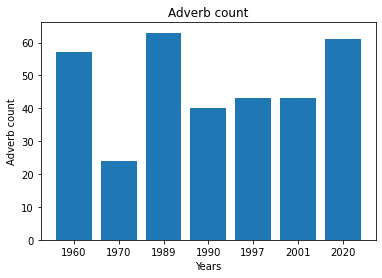

In [52]:
from nltk import chunk

##=================================Adverbs in 1960=============================
#create a list of 50 sentenes
s_list_1960 = ['0'] * 50
tags_1960 = []
words_1960 = []
adv_count_1960 = 0
i = 0
while i < 50:
    s_list_1960[i] = sent_split_text_1960[i]
    words_1960 = words_1960 + nltk.word_tokenize(s_list_1960[i])
    i += 1
tags_1960 = nltk.pos_tag(words_1960)
for tuple in tags_1960:
    if tuple[1] == 'RB':
        adv_count_1960 += 1

print("Adverb count for 1960: ", adv_count_1960)
##=================================Adverbs in 1970=============================
#create a list of 50 sentenes
s_list_1970 = ['0'] * 50
tags_1970 = []
words_1970 = []
adv_count_1970 = 0
i = 0
while i < 50:
    s_list_1970[i] = sent_split_text_1970[i]
    words_1970 = words_1970 + nltk.word_tokenize(s_list_1970[i])
    i += 1
tags_1970 = nltk.pos_tag(words_1970)
for tuple in tags_1970:
    if tuple[1] == 'RB':
        adv_count_1970 += 1
print("Adverb count for 1970: ", adv_count_1970)
##=================================Adverbs in 1989=============================
#create a list of 50 sentenes
s_list_1989 = ['0'] * 50
tags_1989 = []
words_1989 = []
adv_count_1989 = 0
i = 0
while i < 50:
    s_list_1989[i] = sent_split_text_1989[i]
    words_1989 = words_1989 + nltk.word_tokenize(s_list_1989[i])
    i += 1
tags_1989 = nltk.pos_tag(words_1989)
for tuple in tags_1989:
    if tuple[1] == 'RB':
        adv_count_1989 += 1
print("Adverb count for 1989: ", adv_count_1989)
##=================================Adverbs in 1990=============================
#create a list of 50 sentenes
s_list_1990 = ['0'] * 50
tags_1990 = []
words_1990 = []
adv_count_1990 = 0
i = 0
while i < 50:
    s_list_1990[i] = sent_split_text_1990[i]
    words_1990 = words_1990 + nltk.word_tokenize(s_list_1990[i])
    i += 1
tags_1990 = nltk.pos_tag(words_1990)
for tuple in tags_1990:
    if tuple[1] == 'RB':
        adv_count_1990 += 1
print("Adverb count for 1990: ", adv_count_1990)
##=================================Adverbs in 1997=============================
#create a list of 50 sentenes
s_list_1997 = ['0'] * 50
tags_1997 = []
words_1997 = []
adv_count_1997 = 0
i = 0
while i < 50:
    s_list_1997[i] = sent_split_text_1997[i]
    words_1997 = words_1997 + nltk.word_tokenize(s_list_1997[i])
    i += 1
tags_1997 = nltk.pos_tag(words_1997)
for tuple in tags_1997:
    if tuple[1] == 'RB':
        adv_count_1997 += 1
print("Adverb count for 1997: ", adv_count_1997)
##=================================Adverbs in 2001=============================
#create a list of 50 sentenes
s_list_2001 = ['0'] * 50
tags_2001 = []
words_2001 = []
adv_count_2001 = 0
i = 0
while i < 50:
    s_list_2001[i] = sent_split_text_2001[i]
    words_2001 = words_2001 + nltk.word_tokenize(s_list_2001[i])
    i += 1
tags_2001 = nltk.pos_tag(words_2001)
for tuple in tags_2001:
    if tuple[1] == 'RB':
        adv_count_2001 += 1
print("Adverb count for 2001: ", adv_count_2001)
##=================================Adverbs in 2020=============================
#create a list of 50 sentenes
s_list_2020 = ['0'] * 50
tags_2020 = []
words_2020 = []
adv_count_2020 = 0
i = 0
while i < 50:
    s_list_2020[i] = sent_split_text_2020[i]
    words_2020 = words_2020 + nltk.word_tokenize(s_list_2020[i])
    i += 1
tags_2020 = nltk.pos_tag(words_2020)
for tuple in tags_2020:
    if tuple[1] == 'RB':
        adv_count_2020 += 1
print("Adverb count for 2020: ", adv_count_2020)
#================================================================
x = ["1960", "1970", "1989", "1990", "1997","2001","2020"]
y = [adv_count_1960, adv_count_1970, adv_count_1989, \
     adv_count_1990, adv_count_1997,adv_count_2001,adv_count_2020]
plt.bar(x, y)
#addlabels(x, y)
plt.xlabel("Years")
plt.ylabel("Adverb count")
plt.title('Adverb count')
plt.show()

Verb count for 1960:  24
Verb count for 1970:  19
Verb count for 1989:  33
Verb count for 1990:  13
Verb count for 1997:  18
Verb count for 2001:  19
Verb count for 2020:  21


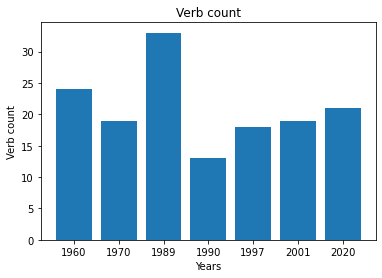

In [53]:
from nltk import chunk

##=================================Verbs in 1960=============================
#create a list of 50 sentenes
s_list_1960 = ['0'] * 50
tags_1960 = []
words_1960 = []
v_count_1960 = 0
i = 0
while i < 50:
    s_list_1960[i] = sent_split_text_1960[i]
    words_1960 = words_1960 + nltk.word_tokenize(s_list_1960[i])
    i += 1
tags_1960 = nltk.pos_tag(words_1960)
for tuple in tags_1960:
    if tuple[1] == 'VBG':
        v_count_1960 += 1

print("Verb count for 1960: ", v_count_1960)
##=================================Verbs in 1970=============================
#create a list of 50 sentenes
s_list_1970 = ['0'] * 50
tags_1970 = []
words_1970 = []
v_count_1970 = 0
i = 0
while i < 50:
    s_list_1970[i] = sent_split_text_1970[i]
    words_1970 = words_1970 + nltk.word_tokenize(s_list_1970[i])
    i += 1
tags_1970 = nltk.pos_tag(words_1970)
for tuple in tags_1970:
    if tuple[1] == 'VBG':
        v_count_1970 += 1
print("Verb count for 1970: ", v_count_1970)
##=================================Verbs in 1989=============================
#create a list of 50 sentenes
s_list_1989 = ['0'] * 50
tags_1989 = []
words_1989 = []
v_count_1989 = 0
i = 0
while i < 50:
    s_list_1989[i] = sent_split_text_1989[i]
    words_1989 = words_1989 + nltk.word_tokenize(s_list_1989[i])
    i += 1
tags_1989 = nltk.pos_tag(words_1989)
for tuple in tags_1989:
    if tuple[1] == 'VBG':
        v_count_1989 += 1
print("Verb count for 1989: ", v_count_1989)
##=================================Verbs in 1990=============================
#create a list of 50 sentenes
s_list_1990 = ['0'] * 50
tags_1990 = []
words_1990 = []
v_count_1990 = 0
i = 0
while i < 50:
    s_list_1990[i] = sent_split_text_1990[i]
    words_1990 = words_1990 + nltk.word_tokenize(s_list_1990[i])
    i += 1
tags_1990 = nltk.pos_tag(words_1990)
for tuple in tags_1990:
    if tuple[1] == 'VBG':
        v_count_1990 += 1
print("Verb count for 1990: ", v_count_1990)
##=================================Verbs in 1997=============================
#create a list of 50 sentenes
s_list_1997 = ['0'] * 50
tags_1997 = []
words_1997 = []
v_count_1997 = 0
i = 0
while i < 50:
    s_list_1997[i] = sent_split_text_1997[i]
    words_1997 = words_1997 + nltk.word_tokenize(s_list_1997[i])
    i += 1
tags_1997 = nltk.pos_tag(words_1997)
for tuple in tags_1997:
    if tuple[1] == 'VBG':
        v_count_1997 += 1
print("Verb count for 1997: ", v_count_1997)
##=================================Verbs in 2001=============================
#create a list of 50 sentenes
s_list_2001 = ['0'] * 50
tags_2001 = []
words_2001 = []
v_count_2001 = 0
i = 0
while i < 50:
    s_list_2001[i] = sent_split_text_2001[i]
    words_2001 = words_2001 + nltk.word_tokenize(s_list_2001[i])
    i += 1
tags_2001 = nltk.pos_tag(words_2001)
for tuple in tags_2001:
    if tuple[1] == 'VBG':
        v_count_2001 += 1
print("Verb count for 2001: ", v_count_2001)
##=================================Verbs in 2020=============================
#create a list of 50 sentenes
s_list_2020 = ['0'] * 50
tags_2020 = []
words_2020 = []
v_count_2020 = 0
i = 0
while i < 50:
    s_list_2020[i] = sent_split_text_2020[i]
    words_2020 = words_2020 + nltk.word_tokenize(s_list_2020[i])
    i += 1
tags_2020 = nltk.pos_tag(words_2020)
for tuple in tags_2020:
    if tuple[1] == 'VBG':
        v_count_2020 += 1
print("Verb count for 2020: ", v_count_2020)
#================================================================
x = ["1960", "1970", "1989", "1990", "1997","2001","2020"]
y = [v_count_1960, v_count_1970, v_count_1989, v_count_1990,\
     v_count_1997, v_count_2001, v_count_2020]
plt.bar(x, y)
#addlabels(x, y)
plt.xlabel("Years")
plt.ylabel("Verb count")
plt.title('Verb count')
plt.show()

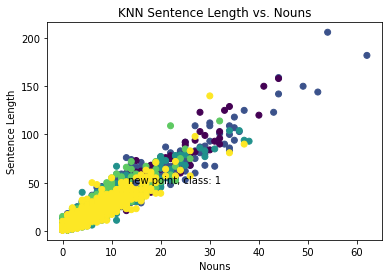

<Figure size 1440x1080 with 0 Axes>

In [54]:
#Source referenced: 
#https://www.w3schools.com/python/python_ml_knn.asp
from sklearn.neighbors import KNeighborsClassifier

data = list(zip(knn_nouns, knn_sen_len))
knn = KNeighborsClassifier(n_neighbors = 100)

knn.fit(data, knn_class)

new_x = 15
new_y = 50
new_point = [(new_x, new_y)]

prediction = knn.predict(new_point)

plt.scatter(x = knn_nouns + [new_x], y = knn_sen_len + [new_y],\
            c = knn_class + [prediction[0]])
plt.text(x = new_x - 1.7, y = new_y - 0.7, \
         s=f"new point, class: {prediction[0]}")
plt.title('KNN Sentence Length vs. Nouns')
plt.xlabel("Nouns")
plt.ylabel("Sentence Length");
plt.figure(figsize = (20, 15), facecolor = None)

plt.show()

# Graphs

In [55]:
# Source: https://www.geeksforgeeks.org/generating-word-cloud-python/
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import spacy

nlp = spacy.load("en_core_web_sm")

def create_wordcloud(texts,title):
	stopwords = set(STOPWORDS)
	docs = [ nlp(text) for text in texts]
	rows = []
	for doc in docs:
		rows += [[tok,tok.pos_] for tok in doc]

	df_pos2 = pd.DataFrame(rows,columns=["word","pos"])
	words_1800 = df_pos2[df_pos2.pos != "PROPN"]\
    .word.astype(str).tolist()
	words_1800_str = " ".join(words_1800).replace(".","")
	wordcloud = WordCloud(width = 800, height = 800,
					background_color ='white',
					stopwords = stopwords,
					min_font_size = 10).generate(words_1800_str)

	plt.figure(figsize = (8, 8), facecolor = None)
	plt.imshow(wordcloud)
	plt.axis("off")
	plt.tight_layout(pad = 0)
	plt.title(title)
	plt.show()

create_wordcloud(novel_df.Excerpt,"Word Frequency")

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:

# stacked bar chart
# Source:https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
years = ['1813', '1818','1847','1847_a', '1850']

d = {}
d["Nouns"] = [noun_count_1813, noun_count_1818, noun_count_1847,\
              noun_count_1847_a, noun_count_1850]
d["Verbs"] = [v_count_1813, v_count_1818, v_count_1847,\
              v_count_1847_a, v_count_1850]
d["Adjectives"] = [adj_count_1813, adj_count_1818, adj_count_1847,\
                   adj_count_1847_a, adj_count_1850]
d["Adverbs"] = [adv_count_1813, adv_count_1818, adv_count_1847, \
                adv_count_1847_a, adv_count_1850]

df = pd.DataFrame(d,index=years)
df.plot(kind='bar',stacked=True, color=["pink","orange",\
                                        "lightgreen",\
                                        "lightblue"]);
plt.xticks(rotation = 0);
plt.title("POS Distribution 1800-1860")
plt.xlabel("Years")
plt.ylabel("Count");

In [ ]:

#Spider chart to see the ratio of nouns, verbs, adjectives, and adverbs in 1860-1914
#Spider chart
#Source used for overall spider chart code:
# https://towardsdatascience.com/how-to-create-a-radar-chart-in-python-36b9ebaa7a64
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

years = ['1860', '1881','1890','1908', '1909']
nouns = [529, 431, 272, 382, 329]
verbs = [45, 27, 21, 40, 20]
adjectives = [152, 183, 111, 128, 121]
adverbs = [96, 102, 52, 82, 50]

fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111, polar=True)
angles=np.linspace(0,2*np.pi,len(years), endpoint=False)

#Nouns Plot
ax.plot(angles,nouns, 'o-', color='g', linewidth=1, \
        label='Nouns')
ax.fill(angles, nouns, alpha=0.25, color='g')
#Verbs Plot
ax.plot(angles,verbs, 'o-', color='blue', linewidth=1,\
        label='Verbs')
ax.fill(angles, verbs, alpha=0.25, color='blue')
ax.set_thetagrids(angles * 180/np.pi, years)
#Adjectives Plot
ax.plot(angles,adjectives, 'o-', color='orange', linewidth=1, \
        label='Adjectives')
ax.fill(angles, adjectives, alpha=0.25, color='orange')
#Adverbs Plot
ax.plot(angles,adverbs, 'o-', color='pink', linewidth=1, \
        label='Adverbs')
ax.fill(angles, adverbs, alpha=0.25, color='pink')

plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:

#Spider chart to see the ratio of nouns, verbs, adjectives, and adverbs in 1860-1914
#Spider chart
#Source used for overall spider chart code:
# https://towardsdatascience.com/how-to-create-a-radar-chart-in-python-36b9ebaa7a64
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
 
years = ["1960", "1970", "1989", "1990", "1997","2001","2020"]
nouns = [315, 211, 262, 244, 199, 249, 181]
verbs = [24, 19, 32, 13, 18, 19, 21] 
adjectives = [93, 68, 78, 79, 63, 104, 49] 
adverbs = [56, 24, 63, 40, 43, 43, 61] 

fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111, polar=True)
angles=np.linspace(0,2*np.pi,len(years), endpoint=False)

#Nouns Plot
ax.plot(angles,nouns, 'o-', color='g', linewidth=1, label='Nouns')
ax.fill(angles, nouns, alpha=0.25, color='g')
#Verbs Plot
ax.plot(angles,verbs, 'o-', color='blue',\
        linewidth=1, label='Verbs')
ax.fill(angles, verbs, alpha=0.25, color='blue')
ax.set_thetagrids(angles * 180/np.pi, years)
#Adjectives Plot
ax.plot(angles,adjectives, 'o-', color='orange',\
        linewidth=1, label='Adjectives')
ax.fill(angles, adjectives, alpha=0.25, color='orange')
#Adverbs Plot
ax.plot(angles,adverbs, 'o-', color='pink',\
        linewidth=1, label='Adverbs')
ax.fill(angles, adverbs, alpha=0.25, color='pink')

plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

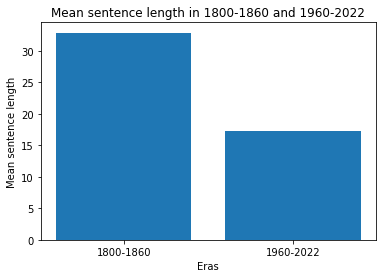

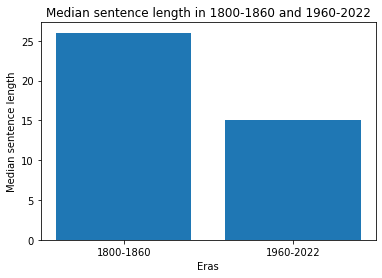

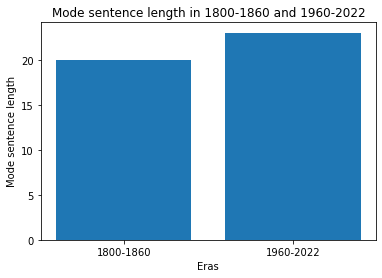

In [62]:

#Bar graphs for mean, median, and mode; comparing 1800-1860 and 1960-2022
#Compare mean, median, and mode for XIX vs XXI century
import statistics
import numpy as np
import matplotlib.pyplot as plt

#Mean for XXI
mean_XXI_list = [mean_1960, mean_1970, mean_1989, \
                 mean_1990, mean_1997, mean_2001, mean_2020]
mean_XXI = statistics.mean(mean_XXI_list)
#print(mean_XXI)

#Median for XXI
median_XXI_list = [median_1960, median_1970, \
                   median_1989, median_1990, median_1997, \
                   median_2001, median_2020]
median_XXI = statistics.median(median_XXI_list)
#print(median_XXI)

#Mode for XXI
mode_XXI_list = [mode_1960, mode_1970, mode_1989, mode_1990,\
                 mode_1997, mode_2001, mode_2020]
mode_XXI = statistics.mode(mode_XXI_list)
#print(mode_XXI)

#Mean for XIX
mean_XIX_list = [mean_1813, mean_1818, mean_1847, \
                 mean_1847_a, mean_1850]
mean_XIX = statistics.mean(mean_XIX_list)
#print(mode_XXI)

#Median for XXI
median_XIX_list = [median_1813, median_1818, median_1847, \
                   median_1847_a, median_1850]
median_XIX = statistics.median(median_XIX_list)

#Mode for XXI
mode_XIX_list = [mode_1813, mode_1818, mode_1847,\
                 mode_1847_a, mode_1850]
mode_XIX = statistics.median(mode_XIX_list)

x = ["1800-1860", "1960-2022"]
y = [mean_XIX, mean_XXI]
plt.bar(x, y)
#addlabels(x, y)
plt.xlabel("Eras")
plt.ylabel("Mean sentence length")
plt.title('Mean sentence length in 1800-1860 and 1960-2022')
plt.show()

x = ["1800-1860", "1960-2022"]
y = [median_XIX, median_XXI]
plt.bar(x, y)
#addlabels(x, y)
plt.xlabel("Eras")
plt.ylabel("Median sentence length")
plt.title('Median sentence length in 1800-1860 and 1960-2022')
plt.show()

x = ["1800-1860", "1960-2022"]
y = [mode_XIX, mode_XXI]
plt.bar(x, y)
#addlabels(x, y)
plt.xlabel("Eras")
plt.ylabel("Mode sentence length")
plt.title('Mode sentence length in 1800-1860 and 1960-2022')
plt.show()

In [ ]:

# Heatmap that shows ratio of nouns, adjectives, adverbs, and verbs over all the eras

# list of eras 
era = ['1800-1860', '1860-1914', '1914-1939', '1939-1960', '1960-2022']

# list of average nouns data per era 
n_data = [(noun_count_1813 + noun_count_1818 + noun_count_1847 \
           + noun_count_1847_a + noun_count_1850) / 5, 
            (noun_count_1864 + noun_count_1881 + noun_count_1890 \
             + noun_count_1908 + noun_count_1909) / 5,
            (noun_count_1915 + noun_count_1922 + noun_count_1926 \
             + noun_count_1930 + noun_count_1937) / 5,
            (noun_count_1939 + noun_count_1940 + noun_count_1940_a \
             + noun_count_1940_b + noun_count_1950) / 5,
            (noun_count_1960 + noun_count_1970 + noun_count_1989 \
             + noun_count_1990 + noun_count_1997 + noun_count_2001 \
             + noun_count_2020) / 7]

# list of average adjectives data per era 
adj_data = [(adj_count_1813 + adj_count_1818 + adj_count_1847 \
             + adj_count_1847_a + adj_count_1850) / 5, 
            (adj_count_1864 + adj_count_1881 + adj_count_1890 \
             + adj_count_1908 + adj_count_1909) / 5,
            (adj_count_1915 + adj_count_1922 + adj_count_1926 \
             + adj_count_1930 + adj_count_1937) / 5,
            (adj_count_1939 + adj_count_1940 + adj_count_1940_a \
             + adj_count_1940_b + adj_count_1950) / 5,
            (adj_count_1960 + adj_count_1970 + adj_count_1989 \
             + adj_count_1990 + adj_count_1997 + adj_count_2001 + adj_count_2020) / 7]

# list of average adverbs data per era 
adv_data = [(adv_count_1813 + adv_count_1818 + adv_count_1847 +\
             adv_count_1847_a + adv_count_1850) / 5, 
            (adv_count_1864 + adv_count_1881 + adv_count_1890 \
             + adv_count_1908 + adv_count_1909) / 5,
            (adv_count_1915 + adv_count_1922 + adv_count_1926 \
             + adv_count_1930 + adv_count_1937) / 5,
            (adv_count_1939 + adv_count_1940 + adv_count_1940_a\
             + adv_count_1940_b + adv_count_1950) / 5,
            (adv_count_1960 + adv_count_1970 + adv_count_1989 \
             + adv_count_1990 + adv_count_1997 + adv_count_2001 \
             + adv_count_2020) / 7]

# list of average verbs data per era 
v_data = [(v_count_1813 + v_count_1818 + v_count_1847 \
           + v_count_1847_a + v_count_1850) / 5, 
            (v_count_1864 + v_count_1881 + v_count_1890 \
             + v_count_1908 + v_count_1909) / 5,
            (v_count_1915 + v_count_1922 + v_count_1926 \
             + v_count_1930 + v_count_1937) / 5,
            (v_count_1939 + v_count_1940 + v_count_1940_a \
             + v_count_1940_b + v_count_1950) / 5,
            (v_count_1960 + v_count_1970 + v_count_1989 \
             + v_count_1990 + v_count_1997 + v_count_2001\
             + v_count_2020) / 7]

hm_df = pd.DataFrame({'Nouns' : n_data,
                     'Adjectives' : adj_data,
                     'Adverbs' : adv_data,
                     'Verbs' : v_data}, 
                    index = era)

fig, ax = plt.subplots(figsize=(15, 10))
hm = sns.heatmap(hm_df, cmap="BuGn", linewidths=.75, \
                 annot_kws={"fontsize":20})
plt.xlabel("Part of Speech", size=18)
plt.ylabel("Era", size=18)
plt.title("Average Parts of Speech per Era", size=20)


In [ ]:

sns.lineplot(data=hm_df)
plt.xlabel("Era", size=18)
plt.ylabel("Average Count", size=18)
plt.title("Average Parts of Speech per Era", size=20)

In [ ]:

plt.style.use('ggplot')

years = ['1960', '1970','1989','1990', '1997','2001', '2020']
nouns = [312, 211, 260, 244, 211, 248, 181]
verbs = [94,68,78,78,61,103,49]
adjectives = [56, 24, 62, 40, 45, 43, 61]
adverbs = [23, 19, 31, 13, 19, 19, 21]

d = {}
d["Nouns"] = [noun_count_1960, noun_count_1970, noun_count_1989,\
              noun_count_1990, noun_count_1997, noun_count_2001,\
              noun_count_2020]
d["Verbs"] = [v_count_1960, v_count_1970, v_count_1989, \
              v_count_1990, v_count_1997, v_count_2001, \
              v_count_2020]
d["Adjectives"] = [adj_count_1960, adj_count_1970, adj_count_1989,\
                   adj_count_1990, adj_count_1997, adj_count_2001, \
                   adj_count_2020]
d["Adverbs"] = [adv_count_1960, adv_count_1970, adv_count_1989, \
                adv_count_1990, adv_count_1997, adv_count_2001, \
                adv_count_2020]

df = pd.DataFrame(d,index=years)

df.plot(kind='bar',stacked=True, color=["pink","orange","lightgreen","lightblue"]);
plt.xticks(rotation = 0);
plt.title("POS Distribution 1960-Present")
plt.xlabel("Years")
plt.ylabel("Count");

Text(0.5, 1.0, 'Average Adverbs per Verbs')

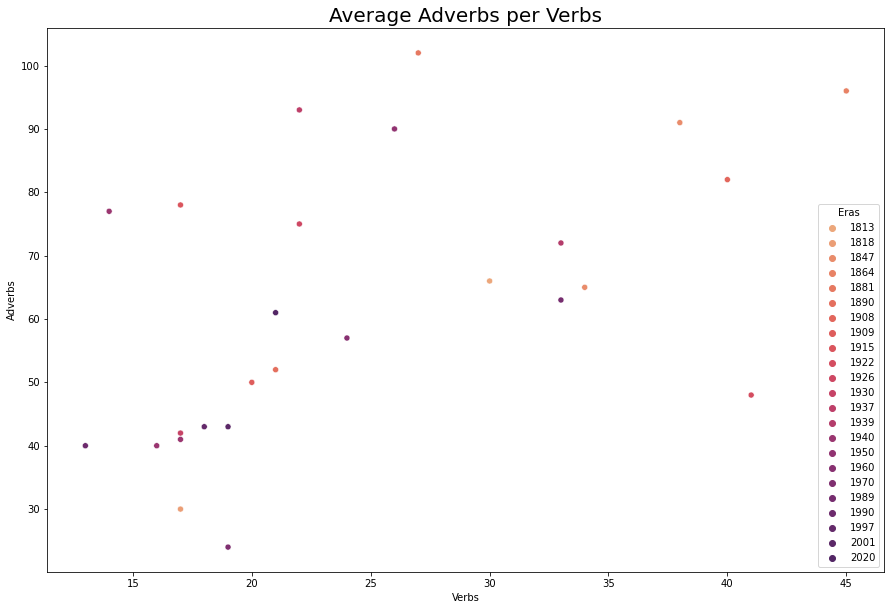

In [60]:

adv_list = [adv_count_1813, adv_count_1818, adv_count_1847, \
            adv_count_1847_a,
            adv_count_1864, adv_count_1881, adv_count_1890, \
            adv_count_1908, adv_count_1909,
            adv_count_1915, adv_count_1922, adv_count_1926, \
            adv_count_1930, adv_count_1937,
            adv_count_1939, adv_count_1940, adv_count_1940_a, \
            adv_count_1940_b, adv_count_1950,
            adv_count_1960, adv_count_1970, adv_count_1989, \
            adv_count_1990, adv_count_1997, adv_count_2001, \
            adv_count_2020]

v_list = [v_count_1813, v_count_1818, v_count_1847, v_count_1847_a,
            v_count_1864, v_count_1881, v_count_1890, \
          v_count_1908, v_count_1909,
            v_count_1915, v_count_1922, v_count_1926, \
          v_count_1930, v_count_1937,
            v_count_1939, v_count_1940, v_count_1940_a, \
          v_count_1940_b, v_count_1950,
            v_count_1960, v_count_1970, v_count_1989, \
          v_count_1990, v_count_1997, v_count_2001, v_count_2020]
era_list = ['1813', '1818', '1847', '1847',
           '1864', '1881', '1890', '1908', '1909',
           '1915', '1922', '1926', '1930', '1937',
           '1939', '1940', '1940', '1940', '1950',
           '1960', '1970', '1989', '1990', '1997', \
            '2001', '2020']
adv_v = pd.DataFrame({'Verbs': v_list, \
                      'Adverbs': adv_list, 'Eras': era_list})

fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(x="Verbs", y="Adverbs", hue="Eras", \
                hue_order = era_list, palette="flare",data = adv_v)
plt.title("Average Adverbs per Verbs", size = 20)

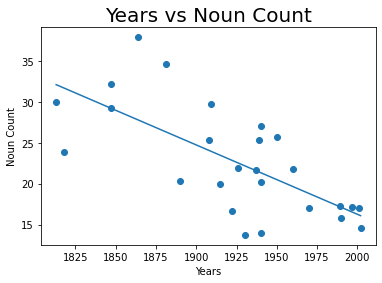

In [58]:

#source referenced: https://www.w3schools.com/python/python_ml_linear_regression.asp
#https://realpython.com/linear-regression-in-python/
import matplotlib.pyplot as plt
from scipy import stats

x = [1813, 1818, 1847, 1847, 1864, 1881, 1890, 1908, 1909, 1915, 1922, 1926, 1930, 1937, 1939, 1940, 1940, 1940, 1950, 1960, 1970, 1989, 1990, 1997, 2001, 2002]
y = [mean_1813, mean_1818, mean_1847, mean_1847_a, mean_1864, mean_1881, mean_1890, mean_1908, mean_1909, mean_1915, mean_1922, mean_1926, mean_1930, mean_1937, mean_1939, mean_1940, mean_1940_a, mean_1940_b, mean_1950, mean_1960, mean_1970, mean_1989, mean_1990, mean_1997, mean_2001, mean_2020]
#print(y)
m, b, r, p, std_err = stats.linregress(x, y)
def line_function(x):
    return m * x + b
lin_reg = list(map(line_function, x))
plt.scatter(x, y)
plt.plot(x, lin_reg)
plt.title("Years vs Noun Count", size = 20)
plt.xlabel("Years")
plt.ylabel("Noun Count")
plt.show()

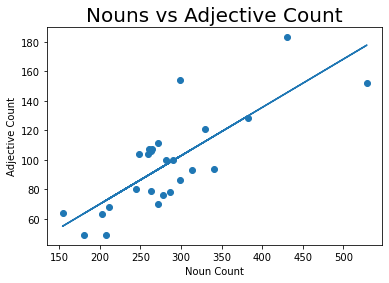

In [59]:
##nouns vs adjectives
x = [noun_count_1813, noun_count_1818, noun_count_1847, noun_count_1847_a, noun_count_1864, noun_count_1881, noun_count_1890, noun_count_1908, noun_count_1909, noun_count_1915, noun_count_1922, noun_count_1926, noun_count_1930, noun_count_1937, noun_count_1939, noun_count_1940, noun_count_1940_a, noun_count_1940_b, noun_count_1950, noun_count_1960, noun_count_1970, noun_count_1989, noun_count_1990, noun_count_1997, noun_count_2001, noun_count_2020]
y = [adj_count_1813, adj_count_1818, adj_count_1847, adj_count_1847_a, adj_count_1864, adj_count_1881, adj_count_1890, adj_count_1908, adj_count_1909, adj_count_1915, adj_count_1922, adj_count_1926, adj_count_1930, adj_count_1937, adj_count_1939, adj_count_1940, adj_count_1940_a, adj_count_1940_b, adj_count_1950, adj_count_1960, adj_count_1970, adj_count_1989, adj_count_1990, adj_count_1997, adj_count_2001, adj_count_2020]
#print(y)
m, b, r, p, std_err = stats.linregress(x, y)
def line_function(x):
    return m * x + b
lin_reg = list(map(line_function, x))
plt.scatter(x, y)
plt.plot(x, lin_reg)
plt.title("Nouns vs Adjective Count", size = 20)
plt.xlabel("Noun Count")
plt.ylabel("Adjective Count")
plt.show()

In [57]:
# Naive Bayes'
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
encoder = preprocessing.LabelEncoder()
senLen = [mean_1813, mean_1818, mean_1847, mean_1847_a, mean_1864, mean_1881, \
          mean_1890, mean_1908, mean_1909, mean_1915, mean_1922, mean_1926, \
          mean_1930, mean_1937, mean_1939, mean_1940, mean_1940_a, mean_1940_b,\
          mean_1950, mean_1960, mean_1970, mean_1989, mean_1990, \
          mean_1997, mean_2001, mean_2020]
nounAv = [noun_count_1813,noun_count_1818, \
          noun_count_1847, noun_count_1847_a, noun_count_1864, \
          noun_count_1881, noun_count_1890, noun_count_1908, noun_count_1909, \
          noun_count_1915, noun_count_1922, noun_count_1926, noun_count_1930, \
          noun_count_1937, noun_count_1939, noun_count_1940, noun_count_1940_a, \
          noun_count_1940_b, noun_count_1950, noun_count_1960, noun_count_1970,\
          noun_count_1989, noun_count_1990, noun_count_1997, \
          noun_count_2001, noun_count_2020]
years = [1813, 1818, 1847, 1847, 1864, 1881, 1890, 1908, 1909, 1915,\
         1922, 1926, 1930, 1937, 1939, 1940, 1940, 1940, 1950, 1960, \
         1970, 1989, 1990, 1997, 2001, 2020]

nounAv_encoded=encoder.fit_transform(nounAv)
senLen_encoded=encoder.fit_transform(senLen)
label=encoder.fit_transform(years)
results=zip(senLen_encoded,nounAv_encoded)
results=list(results)
model = GaussianNB()
model.fit(results,label)

predicted= model.predict([[230,200]]) # 230: average sentence length, 200: average noun count
print("Predicted Value:", predicted)

Predicted Value: [14]


In [ ]:
import nltk
print(nltk.pos_tag(nltk.word_tokenize('tower'))[0][1])

In [61]:
# Naive Bayes'
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
encoder = preprocessing.LabelEncoder()
senLen = [mean_1813, mean_1818, mean_1847, mean_1847_a, mean_1864, mean_1881, \
          mean_1890, mean_1908, mean_1909, mean_1915, mean_1922, mean_1926,\
          mean_1930, mean_1937, mean_1939, mean_1940, mean_1940_a, mean_1940_b,\
          mean_1950, mean_1960, mean_1970, mean_1989, mean_1990, mean_1997,\
          mean_2001, mean_2020]
adjAv = [adj_count_1813,adj_count_1818, adj_count_1847, adj_count_1847_a, adj_count_1864, \
          adj_count_1881, adj_count_1890, adj_count_1908, adj_count_1909, \
          adj_count_1915, adj_count_1922, adj_count_1926, adj_count_1930, \
          adj_count_1937, adj_count_1939, adj_count_1940, adj_count_1940_a, \
          adj_count_1940_b, adj_count_1950, adj_count_1960, adj_count_1970,\
          adj_count_1989, adj_count_1990, adj_count_1997, adj_count_2001, adj_count_2020]
years = [1813, 1818, 1847, 1847, 1864, 1881, 1890, 1908, 1909, 1915, 1922, \
         1926, 1930, 1937, 1939, 1940, 1940, 1940, 1950, 1960, 1970, 1989,\
         1990, 1997, 2001, 2020]

adjAv_encoded=encoder.fit_transform(adjAv)
#print(nounAv_encoded)
senLen_encoded=encoder.fit_transform(senLen)
#print(senLen_encoded)
label=encoder.fit_transform(years)
results=zip(senLen_encoded,adjAv_encoded)
results=list(results)
#print(results)
model = GaussianNB()
model.fit(results,label)

predicted= model.predict([[230,200]]) # 230: average sentence length, 200: average verb count
#print("Predicted Value:", predicted)

In [ ]:
label